# **Used-Cars price prediction- Data Analysis**

###  **Market Overview**

*Although pre-owned car sales are currently 1.5 times more than new car sales, the gap is set to increase in the coming years, as per a study commissioned by Volkswagen India.*

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. CARS 4U INDIA , founded in 2020 is a budding tech start-up that offers an efficient and reliable way to car owners to sell their cars at the best price.It's mission is to revolutionise the way used cars are sold in India.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market behaves very differently, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, manufacturing year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### **Key Question**

What are the key influential features that impacts the price of the used cars in the current market?

### **Goal**

Design a pricing model that could be used to predict the used cars prices and can help the business in strategizing and making data driven profitable decisions.



#### **Attribute Information**

The dataset contains the following attributes:

* **S.No.**: Serial Number
* **Name**: Name of the car which includes Brand name and Model name
* **Year**: Manufacturing year of the car
* **Kilometers_driven**: The total kilometers driven in the car by the previous owner(s) in KM
* **Fuel_Type**: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* **Transmission**: The type of transmission used by the car (Automatic / Manual)
* **Owner**: Type of ownership
* **Mileage**: The standard mileage offered by the car company in KMPL or KM/KG
* **Engine**: The displacement volume of the engine in CC
* **Power**: The maximum power of the engine in BHP
* **Seats**: The number of seats in the car
* **New_Price**: The price of a new car of the same model in INR 100,000
* **Price**: The price of the used car in INR 100,000


In [1]:
#importing libraries
import pandas as pd
import numpy as np

#import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [2]:
df=pd.read_csv("used_cars.csv")
df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [3]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [4]:
df.shape

(7253, 14)

### **Observations and Insights:**

- There are **7253 rows and 14 columns** in the data set.
- The Brand name and Model name are combined together in one column called 'Name'.
- The first column S.No seems to be the index for data entry since the number of unique values are equal to the number of observations.  Therefore, the first column could be dropped, since it does not provide any useful insights and predictive power for analysis.

**

In [5]:
#dropping the Sr.No. column**
df.drop(columns=["S.No."], inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


**Observations:**
    
- There are several columns with less than 7253 non-null enries i.e **these columns have missing values.
- Manufacturing Year and Seats have int datatype. It would be convenient to convert them into categorical variables in the analysis phase.**


In [7]:
#counts and percentage of missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print((missing_data[column].value_counts())/(df.shape[0])*100)
    print("*"*40)

Name
False    7253
Name: Name, dtype: int64
False    100.0
Name: Name, dtype: float64
****************************************
Location
False    7253
Name: Location, dtype: int64
False    100.0
Name: Location, dtype: float64
****************************************
Year
False    7253
Name: Year, dtype: int64
False    100.0
Name: Year, dtype: float64
****************************************
Kilometers_Driven
False    7253
Name: Kilometers_Driven, dtype: int64
False    100.0
Name: Kilometers_Driven, dtype: float64
****************************************
Fuel_Type
False    7253
Name: Fuel_Type, dtype: int64
False    100.0
Name: Fuel_Type, dtype: float64
****************************************
Transmission
False    7253
Name: Transmission, dtype: int64
False    100.0
Name: Transmission, dtype: float64
****************************************
Owner_Type
False    7253
Name: Owner_Type, dtype: int64
False    100.0
Name: Owner_Type, dtype: float64
****************************************
Mil

### **Observations and Insights:**
    
** Attributes such as Mileage, Engine , Power , Seats , New_price and Price of used cars needs to be treated for missing values.
 - Missing values in each attribute:-

  "Mileage" : 2 missing data 
  
  "Engine": 46  missing data
  
  "Power" : 175 missing data (~2.4%)
  
  "Seats" : 53 missing data
  
  "New_Price" : 6247  missing data (~86%)
  
  "Price" : 1234 missing data (~17%)
  
  
**

## Exploratory Data Analysis and Data Preprocessing

** Now that we have a clear understanding of the business problem which we want to solve and also we have loaded the datasets. The next step to follow is to have a better understanding of the dataset i.e. **the distribution of the variables, different relationships that exist between variables,the strengths of the relationship etc.** If there is any data anomaly like **missing values, outliers,** how do we treat them to prepare the dataset for building the predictive model.**

In [8]:
#Summary Statistics for numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations:**
    
- TThe manufacturing year ranges from 1996-2019.
- On an average, the total KM driven in the car by the previous owner(s) is ~ 58,699Km.The standard deviation of KM driven is very large which does make sense since the maximum value for KM driven is 6,500,000. This might be an outlier which is driving a large variability in the distribution of this attribute. 
- The used cars gives an average mileage of ~ 18KMPL.Also, notice that the minimum value for muileage is 0 which is absurd.This needs to be treated.
- The average price of the new car is ~ INR 22,77,969 whereas the average price of the used car is ~ 9,47,946.


In [9]:
#Checking the extreme values for Kilometers_Driven attribute
df.sort_values(['Kilometers_Driven'],ascending=False).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.0
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0


**Observations and insights:**

- In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [10]:
#dropping the observation with an extreme value of KM_driven
df.drop([2328],inplace=True)
df.sort_values(['Kilometers_Driven'],ascending=False).head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,NaN,7.5
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,5.9


In [11]:
df.sort_values(['Mileage']).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN


**Observations and insights:**
-  Mileage of cars cannot be 0 so we should treat 0's as missing values. 

In [12]:
#Replacing 0's with NaN's
df['Mileage'].replace(0,np.nan,inplace=True)
df['Mileage'].isnull().sum()

83

In [13]:
#Summary Statistics for categorical variables
df.describe(include=[object]).T

,count,unique,top,freq
Name,7252,2041,Mahindra XUV500 W8 2WD,55
Location,7252,11,Mumbai,949
Fuel_Type,7252,5,Diesel,3851
Transmission,7252,2,Manual,5204
Owner_Type,7252,4,First,5951


### **Observations and Insights:**

- There are 2041 unique models of the cars.
- There is data for 11 locations.
- Out of 5 categories of fuel types(Petrol, Diesel, Electric, CNG, LPG) used by cars, diesel stands out in this dataset. 
- There are 2 types of transmissions and out of 7252 total cars, 5204 are manual type.
- There are 4 categories of owner_types in the dataset.Majority of the cars are sold by first time owners.

In [14]:
# Kilometers_Driven to Km_driven
df.rename(columns={'Kilometers_Driven':'KM_driven'}, inplace=True)
df.head(2)

,Name,Location,Year,KM_driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50


# Univariate Analysis 

**Lets analyse each numerical and categorical variable in our dataset to find some trends and patterns**

###  Numerical Variables

In [15]:
def histogram_boxplot(feature, figsize=(15,8), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, palette="Blues") # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--',label='Mean') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-',label='Median') # Add median to the histogram

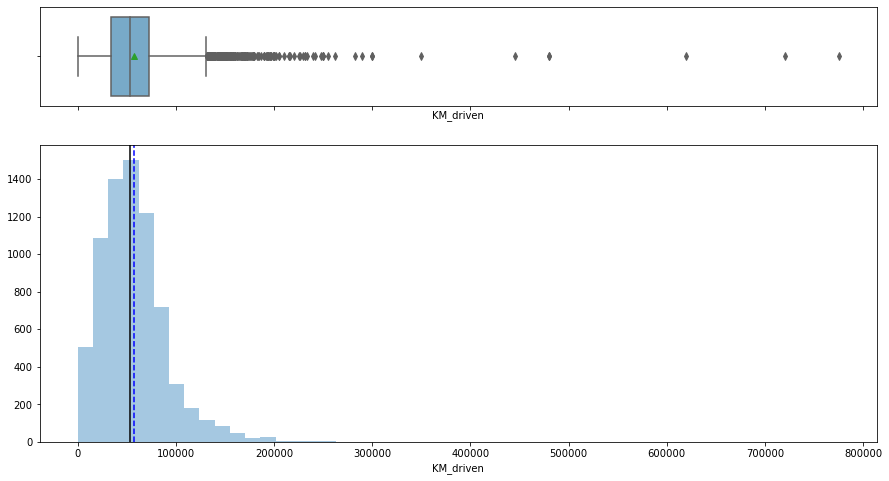

In [16]:
histogram_boxplot(df["KM_driven"])

Observations:
KM_driven(i.e the KM driven in the car by the previous owner)is highly right skewed.Transforming into logarithmic scale will help remove the skewness thereby preserving the difference.

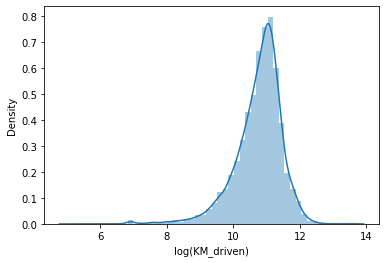

In [17]:
sns.distplot(np.log(df['KM_driven']),axlabel="log(KM_driven)")

In [18]:
#adding log transformed feature to our data set
df['KM_driven_log']=np.log(df['KM_driven'])
df.head(2)

,Name,Location,Year,KM_driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_driven_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327


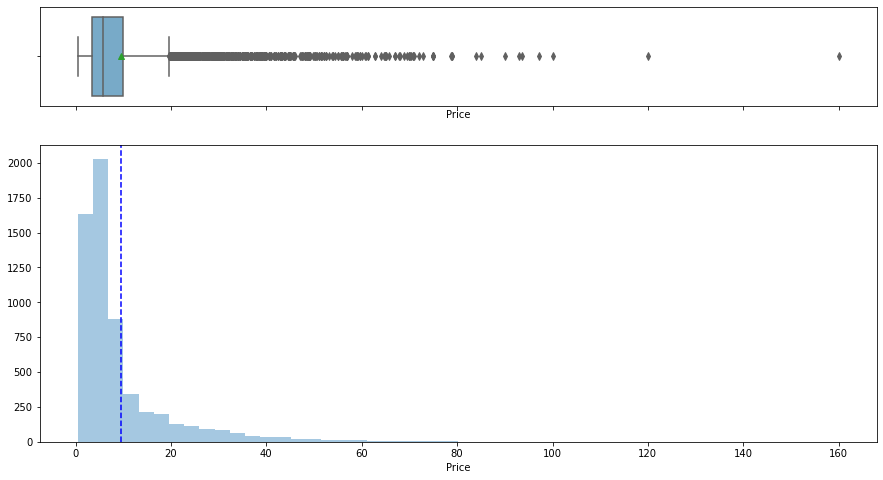

In [19]:
histogram_boxplot(df["Price"])

Observation:- Price is highly right skewed.Log transformation of Price will help remove the skewness.

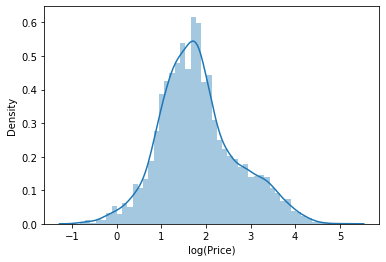

In [20]:
sns.distplot(np.log(df["Price"]),axlabel="log(Price)")

In [21]:
#adding log transformed feature to our data set
df["Price_log"]=np.log(df["Price"])

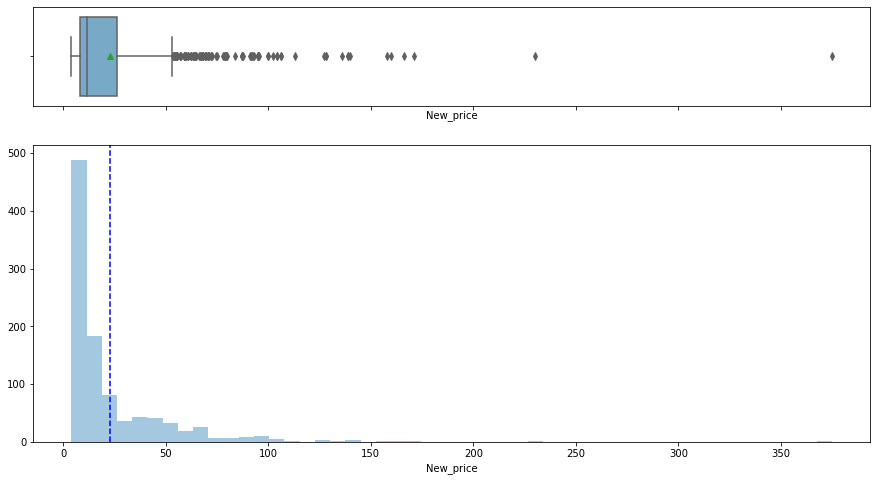

In [22]:
histogram_boxplot(df["New_price"])

Observation:- New price is also right skewed. Tranforming into logarithmic scale will help make the distribution normal.

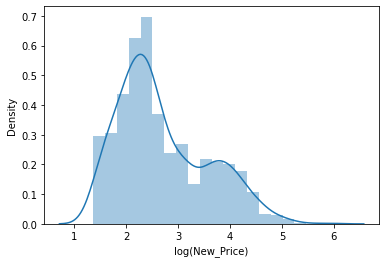

In [23]:
sns.distplot(np.log(df["New_price"]),axlabel="log(New_Price)")

** Notice that the above distribution for Log(new_price) appears to be bimodal. **

In [24]:
#adding log transformed feature to our data set
df["New_price_log"]=np.log(df["New_price"])

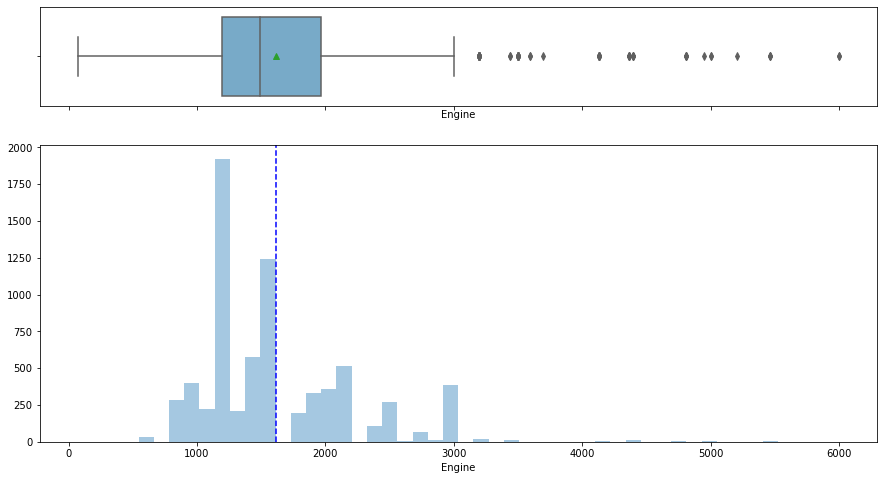

In [25]:
histogram_boxplot(df["Engine"])

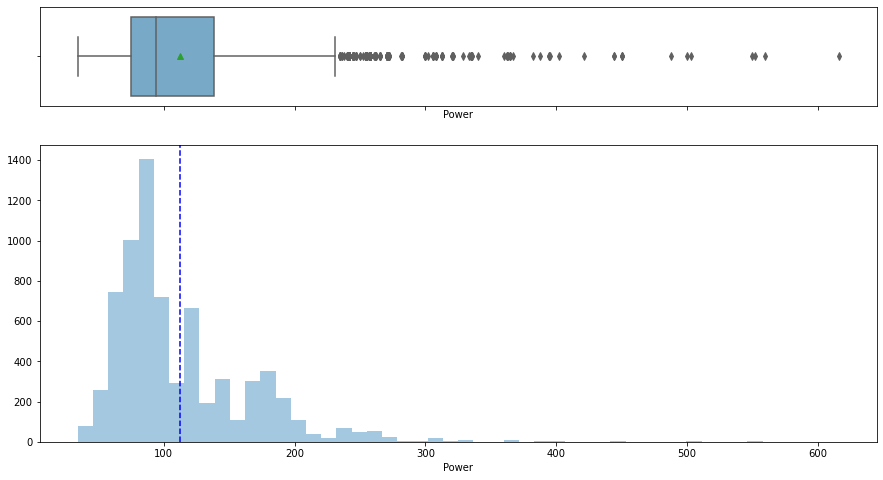

In [26]:
histogram_boxplot(df["Power"])

Observation: We can see a lot of outliers towards the right in the Power variable.

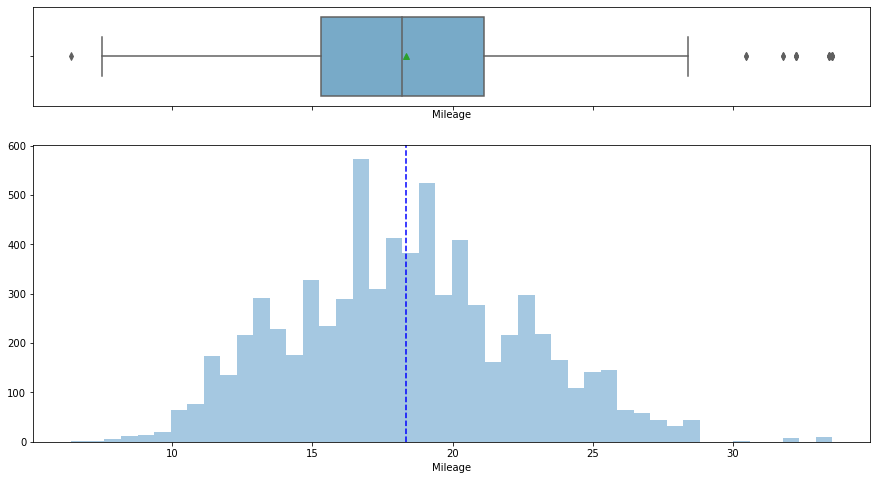

In [27]:
histogram_boxplot(df["Mileage"])

Observations:- Mileage appears to follow a normal distribution with a few outliers towards he right and the presence of 0 values. 

### Categorical Variables

### Checking the percentage of each category for categorical variables

In [28]:
df['Year']=df['Year'].astype("object")
df['Seats']=df['Seats'].astype("object")

In [29]:
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print("Counts:-")
    print(df[col].value_counts())
    print("_"*55)
    print(df[col].value_counts(normalize=True))
    print("*"*55) 

Counts:-
Mahindra XUV500 W8 2WD                        55
Maruti Swift VDI                              49
Maruti Swift Dzire VDI                        42
Honda City 1.5 S MT                           39
Maruti Swift VDI BSIV                         37
                                              ..
Tata Manza Aura Plus Quadrajet BS IV           1
Tata Nano STD SE                               1
Skoda Superb Elegance 1.8 TSI MT               1
Skoda Rapid 1.6 MPI AT Style Black Package     1
Fiat Grande Punto 1.2 Emotion                  1
Name: Name, Length: 2041, dtype: int64
_______________________________________________________
Mahindra XUV500 W8 2WD                        0.007584
Maruti Swift VDI                              0.006757
Maruti Swift Dzire VDI                        0.005792
Honda City 1.5 S MT                           0.005378
Maruti Swift VDI BSIV                         0.005102
                                                ...   
Tata Manza Aura Plus Quadra

In [30]:
# Function to create barplots that indicate percentage for each category.

def Bar_chart(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df[z],palette='Paired',order = df[z].value_counts().index)
    ax.set(ylabel="Used Car Sales")
    plt.xticks(rotation=45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y+10), size = 12) # annotate the percantage 
    plt.show() # show the plot

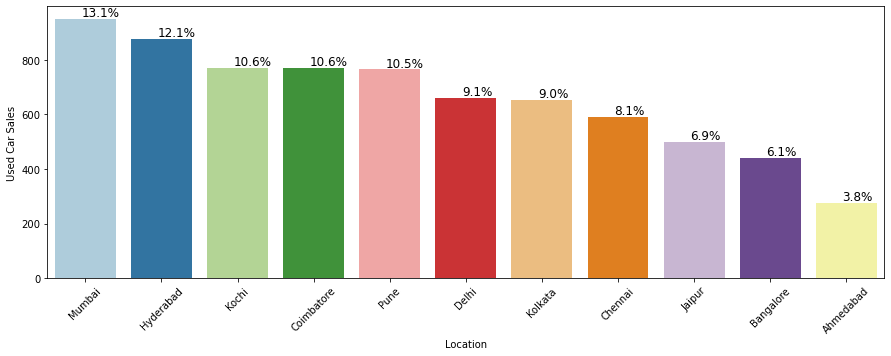

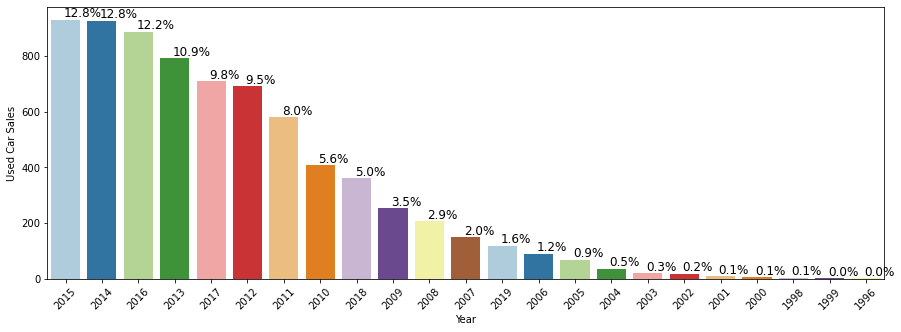

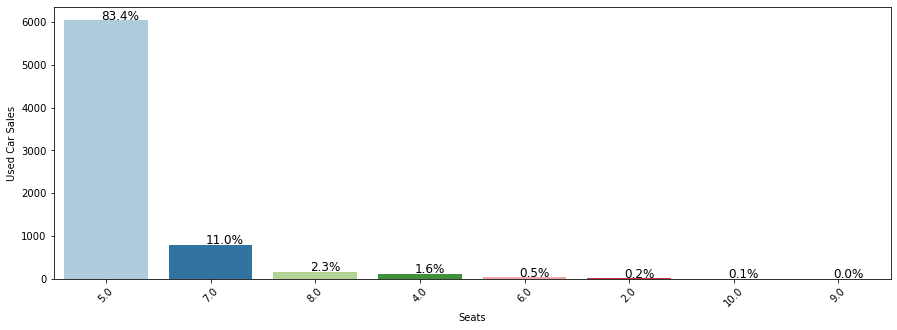

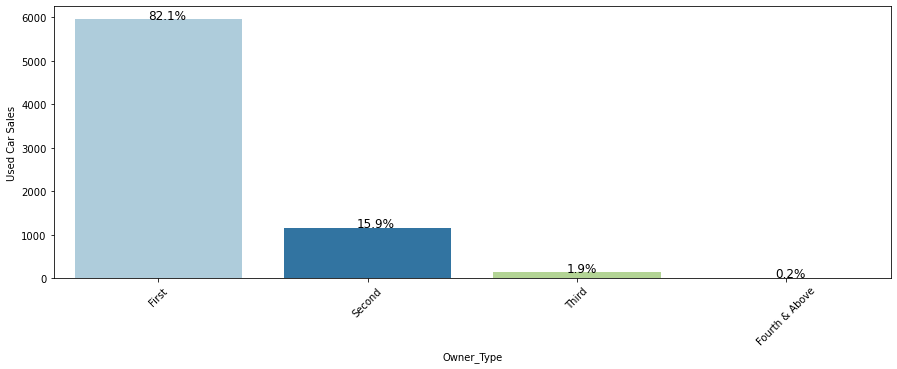

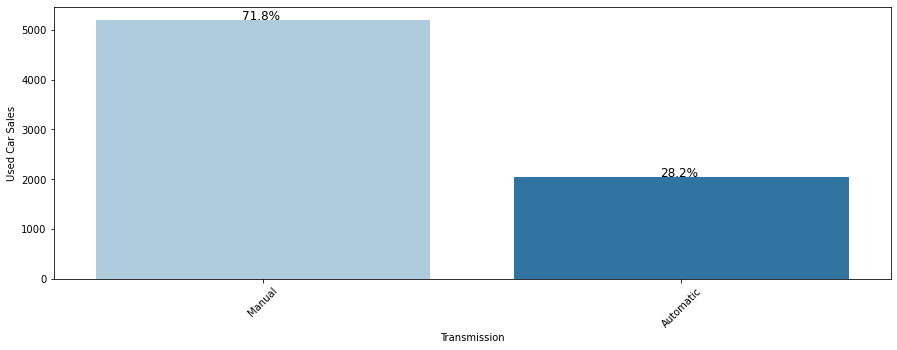

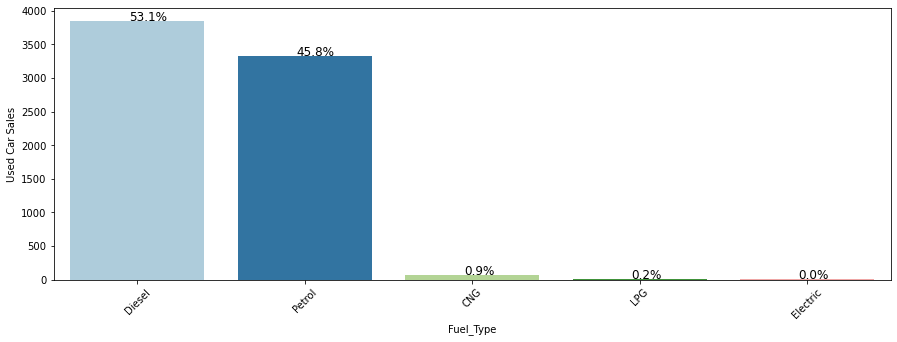

In [31]:
categorical_cols=['Location','Year','Seats', 'Owner_Type','Transmission','Fuel_Type']
for col in categorical_cols:
    Bar_chart(col)    

#### **Observations and Insights:** 

*Univariate analysis helps us understand the individual variables in the data.*

- Mumbai and Hyderabad being tier 1 cities cover about 25% of the total used cars sales, while Ahmedabad has the least sales (about 3.7%).
- Majority of the cars fall into the category of diesel followed by petrol and very few cars sold use LPG,CNG and only 2 are electric.
- About 5900(~82%) cars sold are by first owners while only 1.8% are sold by third owners.
- About 71% of cars sold are manual while the rest are automatic. 
- 5 seater cars are more in demand.About 83% of the cars sold are 5 seaters.
- Manufacturing year of used car ranges from 1996-2019 and about ~54% of used cars sold fall in the interval 2014-2019.
 

**

# Bivariate Analysis 

### ** Scatter plots **

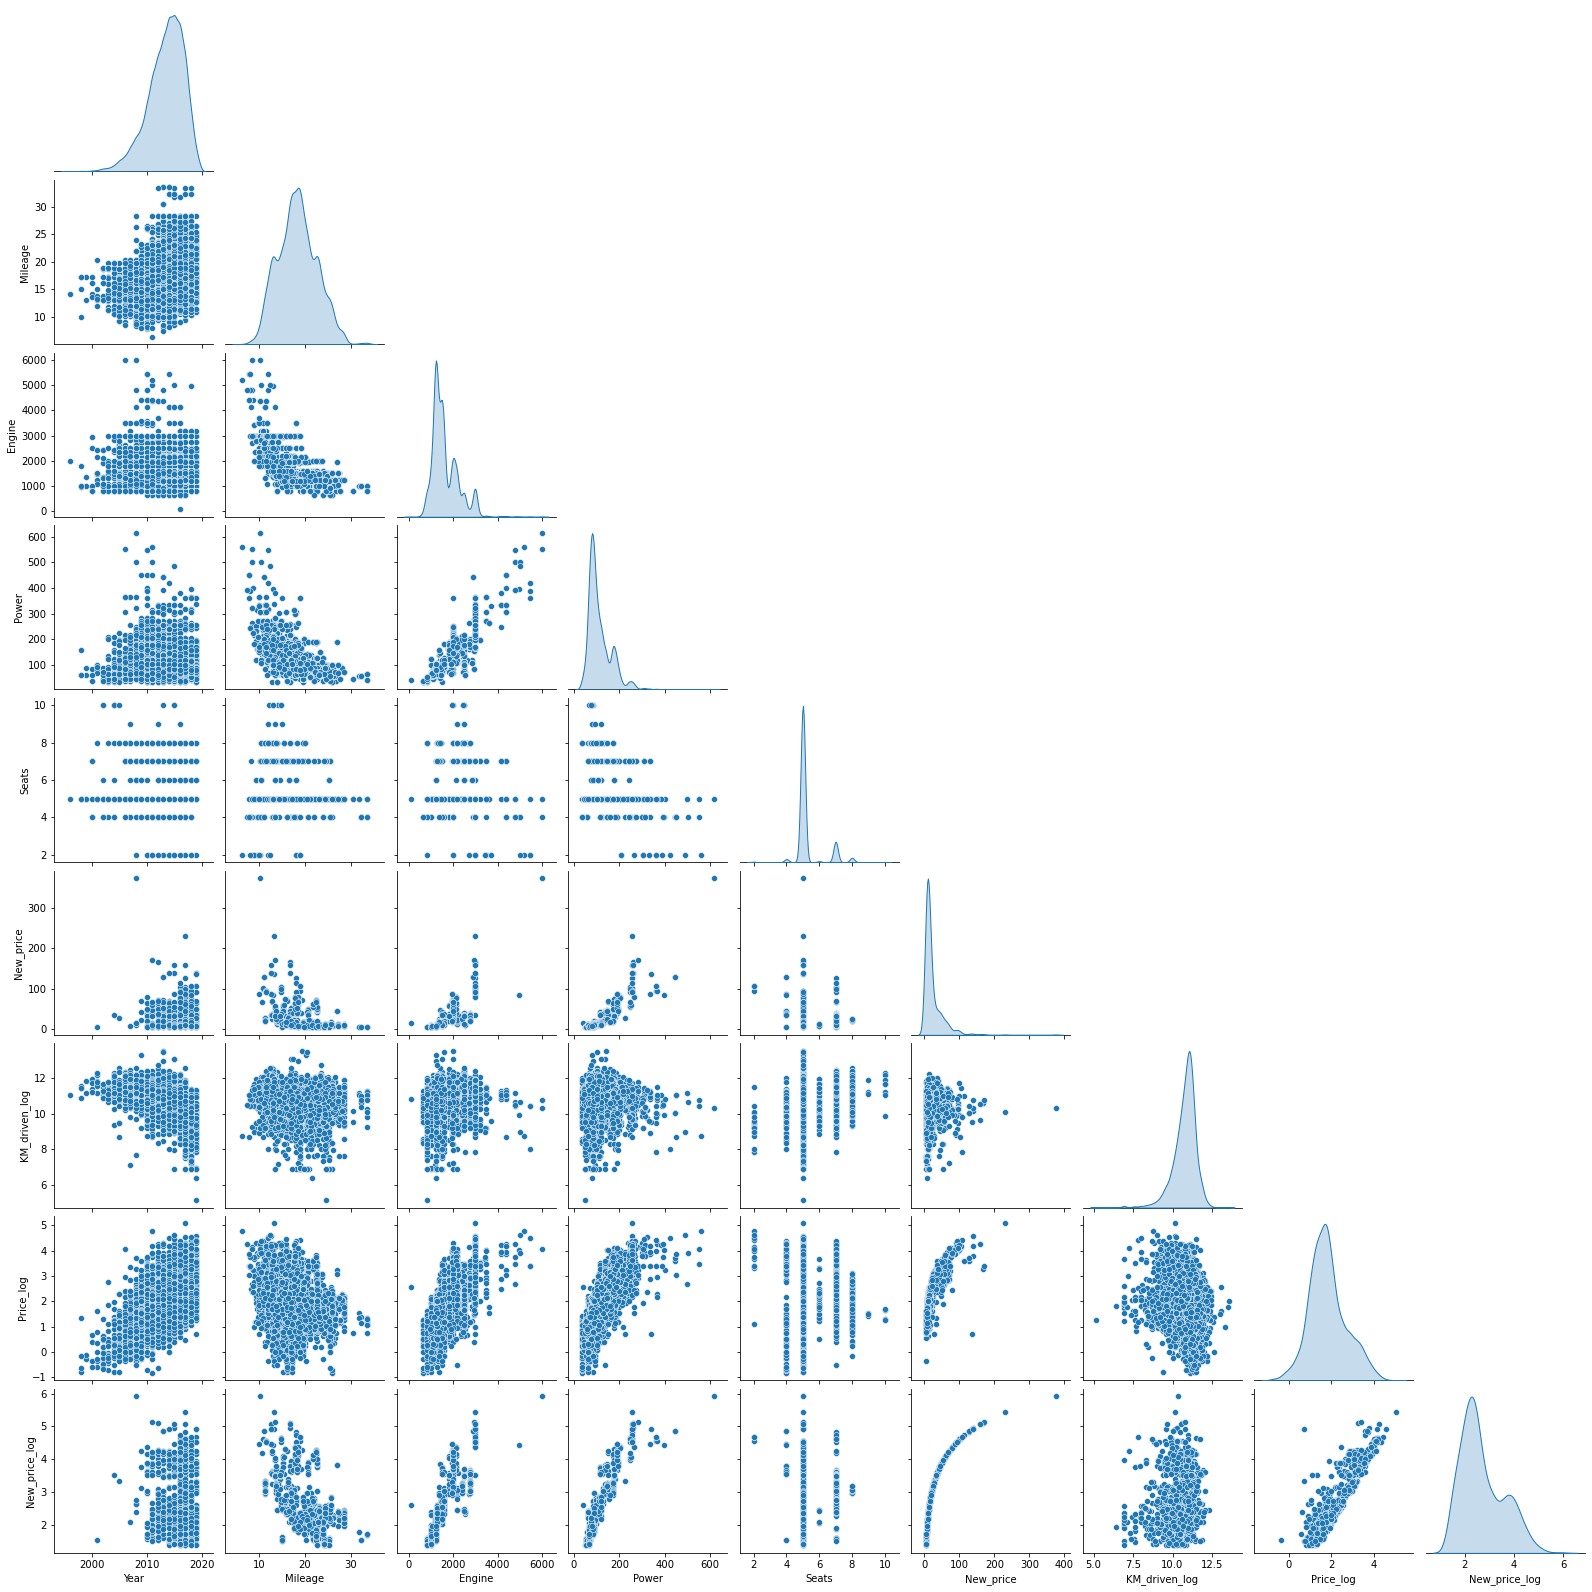

In [32]:
#### pairwise-plot

sns.pairplot(df.drop(['KM_driven','Price'],axis=1), diag_kind='kde', corner=True);

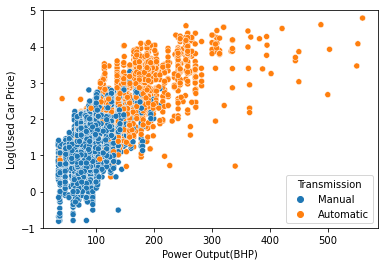

In [33]:
ax=sns.scatterplot(x="Power",y="Price_log",data=df,hue="Transmission")
ax.set(xlabel="Power Output(BHP)", ylabel="Log(Used Car Price)")
ax.set(ylim=(-1.0, 5.0))
plt.show()

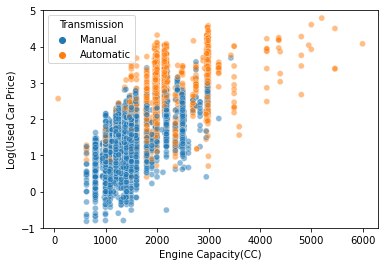

In [34]:
ax=sns.scatterplot(x="Engine",y="Price_log",data=df,alpha=0.5, hue="Transmission")
ax.set(xlabel="Engine Capacity(CC)", ylabel="Log(Used Car Price)")
ax.set(ylim=(-1.0, 5.0))
plt.show()

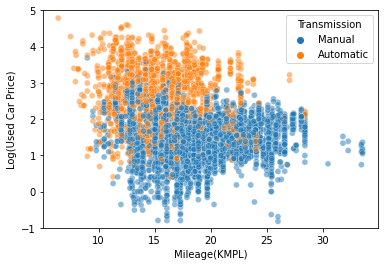

In [35]:
ax=sns.scatterplot(x="Mileage",y="Price_log",data=df,alpha=0.5, hue="Transmission")
ax.set(xlabel="Mileage(KMPL)", ylabel="Log(Used Car Price)")
ax.set(ylim=(-1.0, 5.0))
plt.show()

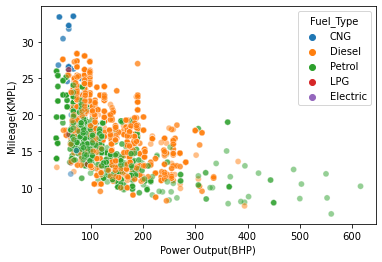

In [36]:
ax=sns.scatterplot(x="Power",y="Mileage",data=df,alpha=0.5, hue="Fuel_Type")
ax.set(xlabel="Power Output(BHP)", ylabel="Mileage(KMPL)")
plt.show()

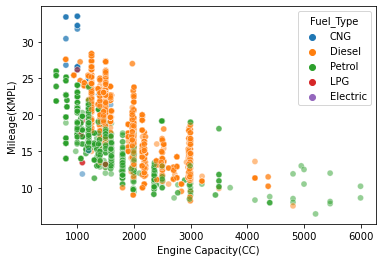

In [37]:
ax=sns.scatterplot(x="Engine",y="Mileage",data=df,alpha=0.5, hue="Fuel_Type")
ax.set(xlabel="Engine Capacity(CC)", ylabel="Mileage(KMPL)")
plt.show()

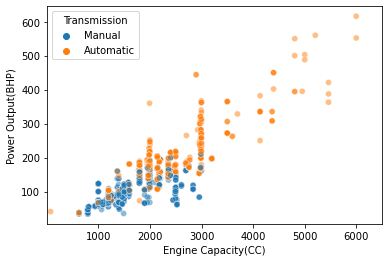

In [38]:
ax=sns.scatterplot(x="Engine",y="Power",data=df,alpha=0.5, hue="Transmission")
ax.set(xlabel="Engine Capacity(CC)", ylabel="Power Output(BHP)")
ax.set(xlim=(10, 6500))
plt.show()

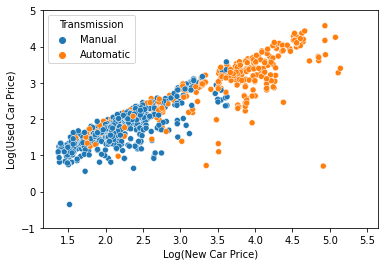

In [39]:
ax=sns.scatterplot(x="New_price_log",y="Price_log",data=df, hue="Transmission" )
ax.set(xlabel="Log(New Car Price)", ylabel="Log(Used Car Price)")
ax.set(ylim=(-1.0, 5.0))
plt.show()

<Figure size 864x1728 with 0 Axes>

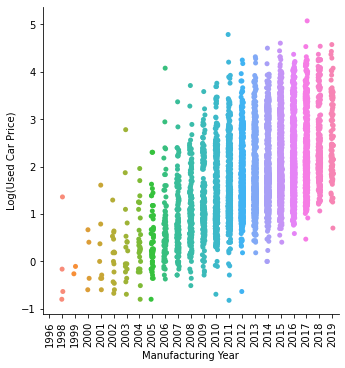

In [40]:
fig=plt.figure(figsize=(12,24))
g=sns.catplot(x="Year",y="Price_log",data=df)
g.set(xlabel="Manufacturing Year", ylabel="Log(Used Car Price)")
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        labels[i]
        #if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()

### ** Lineplots **

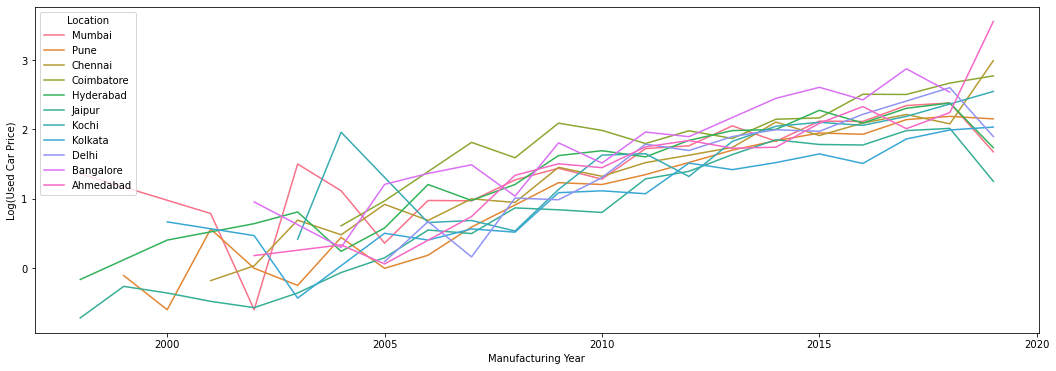

In [41]:
fig=plt.figure(figsize=(18,6))
g=sns.lineplot(x='Year',y='Price_log',data=df,hue="Location",ci=None)
g.set(xlabel="Manufacturing Year", ylabel="Log(Used Car Price)")
plt.show()

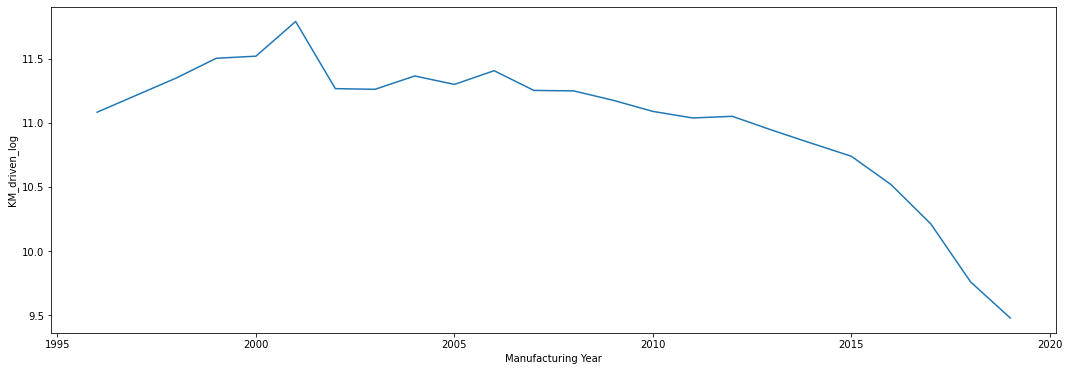

In [42]:
fig=plt.figure(figsize=(18,6))
g=sns.lineplot(x='Year',y='KM_driven_log',data=df,ci=None)
g.set(xlabel="Manufacturing Year", ylabel="KM_driven_log")
plt.show()

### **Box plot**

In [43]:
def boxplot1(z):
    plt.figure(figsize=(15, 5)) 
    g=sns.boxplot(x=z, y=df['Price_log']) 
    g.set(xlabel="Manufacturing Year", ylabel="Log(Used Car Price)")
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=df['Price_log'],showfliers=False) #turning off the outliers
    plt.show()    

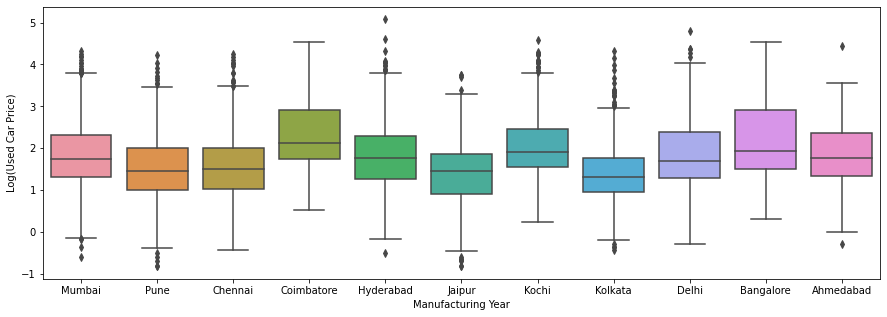

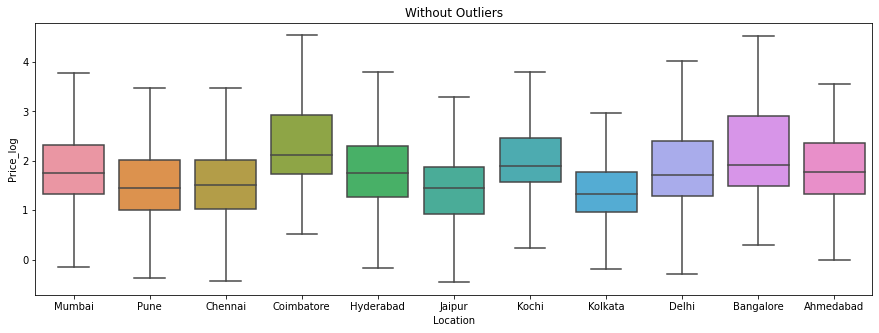

In [44]:
boxplot1(df["Location"])

In [45]:
def boxplot(z):
    plt.figure(figsize=(15, 5)) 
    g=sns.boxplot(x=z, y=df['Price_log'])
    g.set(ylabel="Log(Used Car Price)")
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.title('Without Outliers')
    ax=sns.boxplot(x=z, y=df['Price_log'],showfliers=False) #turning off the outliers
    ax.set(ylabel="Log(Used Car Price)")
    plt.show()    

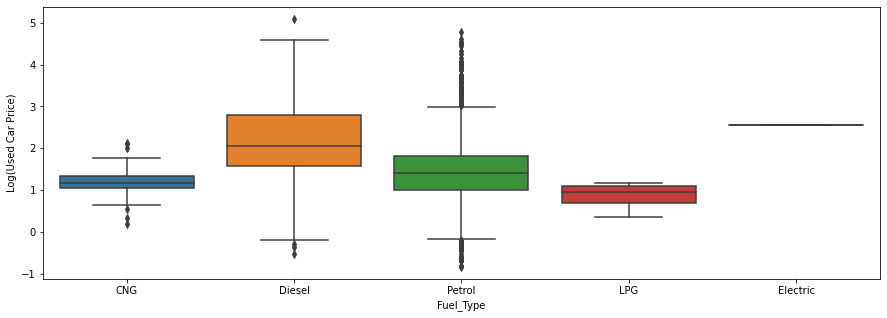

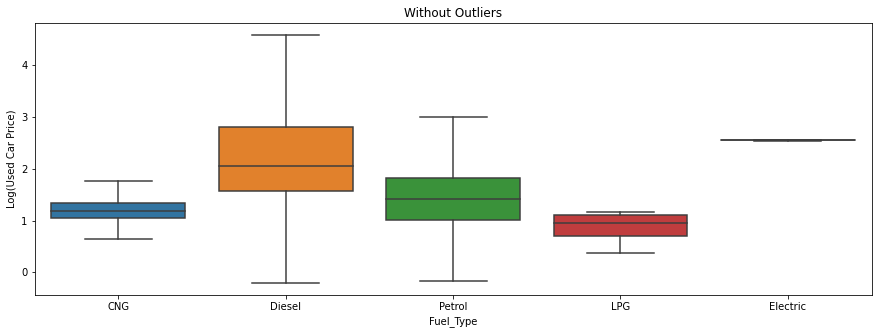

In [46]:
boxplot(df["Fuel_Type"])

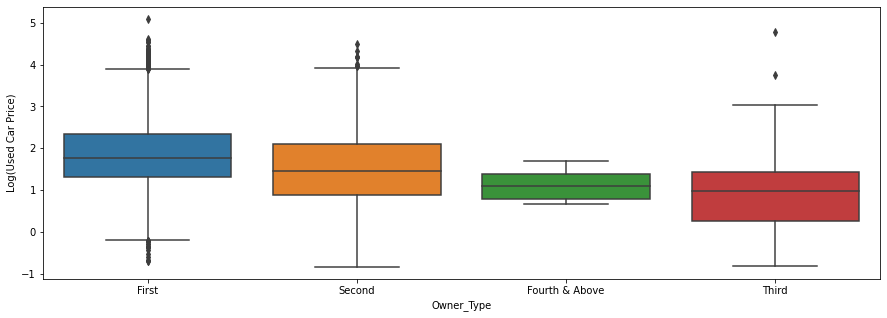

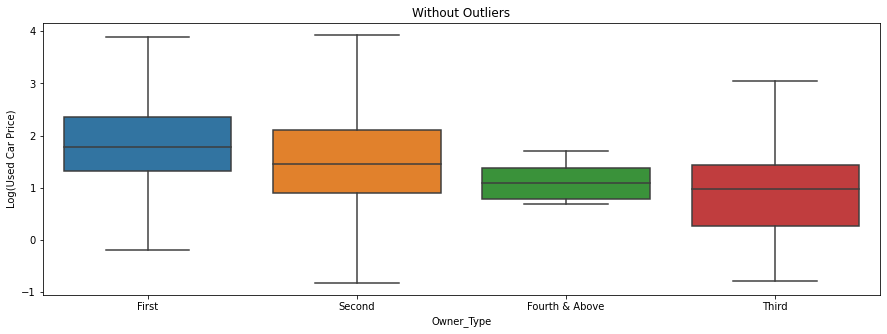

In [47]:
boxplot(df["Owner_Type"])

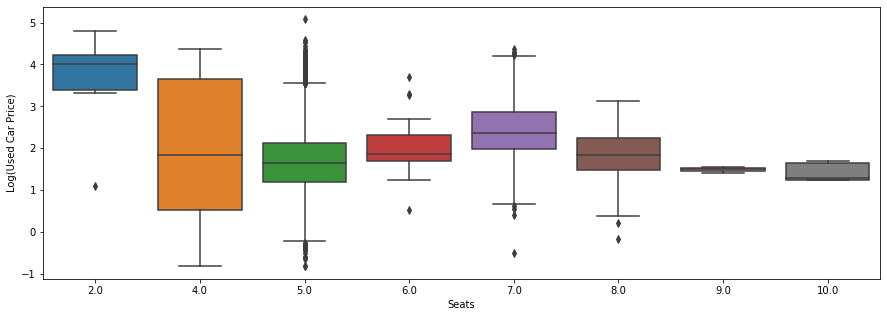

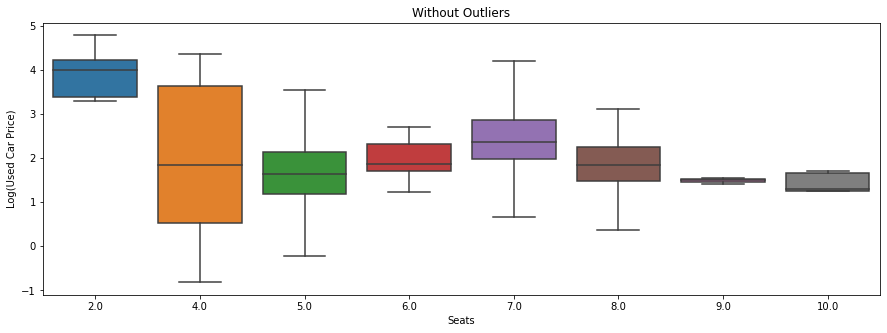

In [48]:
boxplot(df["Seats"])

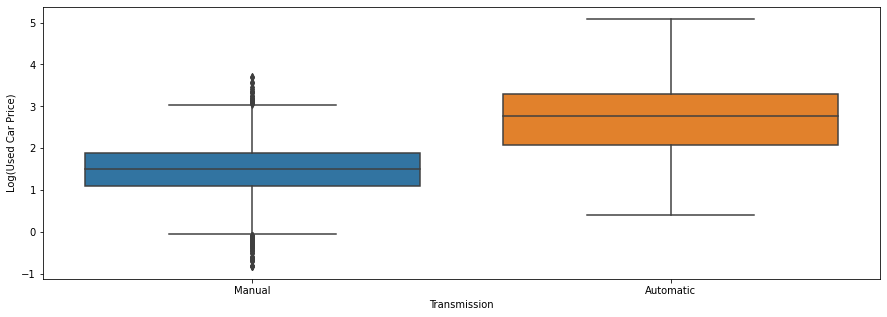

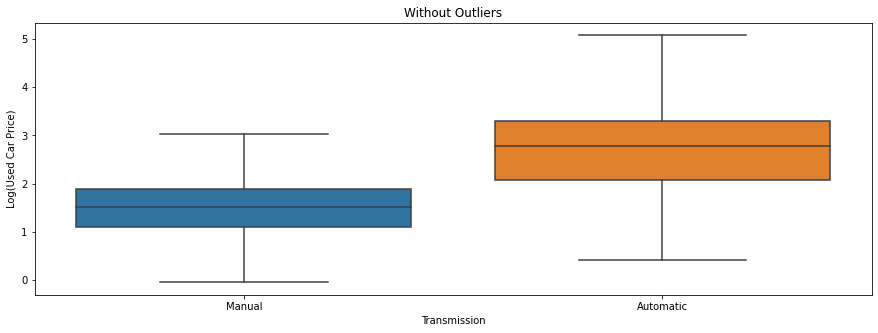

In [49]:
boxplot(df["Transmission"])

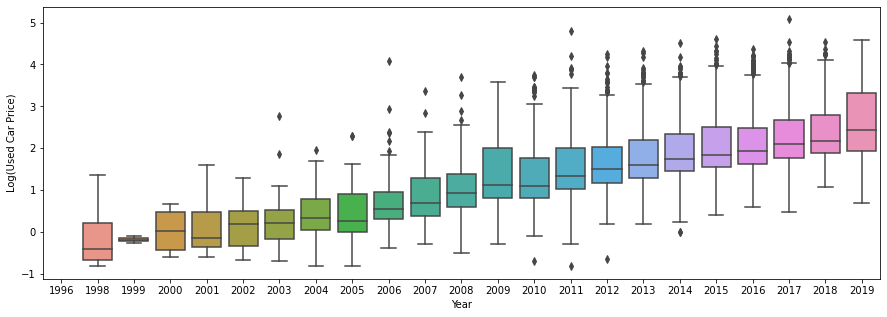

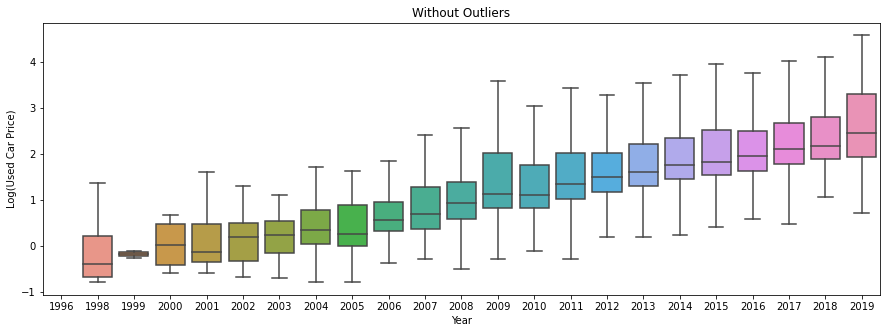

In [50]:
boxplot(df["Year"])

### **Observations and Insights:**

*Bivariate analysis helps us find associations and relationships between two set of values.*

- The scatter plots suggest a positive correlation between the attributes Price_log and the Power Output. So **Power could potentially be a good predictor of price.**
-  Price_log and New_price_log have a strong positive correlation suggesting that **New_price_log could be a potentially good indicator to predict price.** 
-  Also there is a **good relationship between Power and Engine** which needs to be taken into account when developing a model to **avoid multicollinearity.**
- Mileage is negatively correlated with Power and Engine which does make sense since the mileage reduces with the increase in power output and engine capacity.
- The box plot suggests that the average price of automatic cars is more than the average price of the manual cars. So **Transmission could be a good predictor of price.**
- In the boxplot for Fuel_Type we see that the distribution of price between these Fuel_Type categories, Diesel , Petrol and others, are distinct enough to take **Fuel_Type as a potential good predictor of price.**
- The distribution of price between the different Seats categories differs; as such **Seats could potentially be a predictor of price.**
- The boxplot for Owner_Type suggests that, the average price of cars with first owner is more than that with more than one ownership.However, there does not seem to be much difference in the average price of cars between third and higher number of previous owners. **Owner_Type could potentially be a predictor of price.**
- Notice from the boxplot that, the used car average price is more for the newer car models. So **Year could be a potentially good indicator of price.** 
-  For the remaining, it does not seem like there is any strong positive/negative correlation between the variables.   
    

### ** Heat Maps **
Heat map shows a 2D correlation matrix between two discrete features


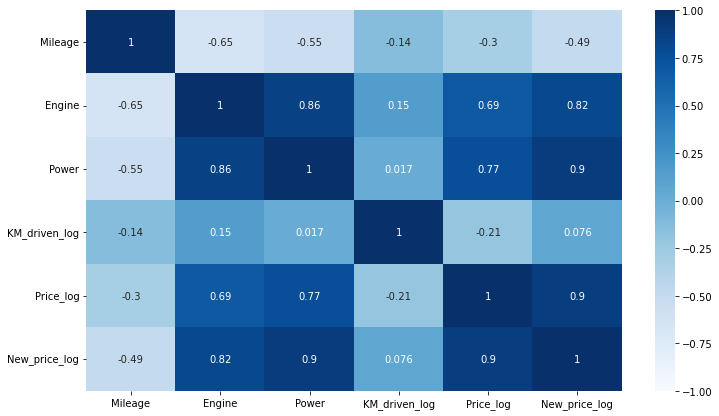

In [51]:
plt.figure(figsize=(12, 7))
g=sns.heatmap(df.drop(["KM_driven","Price","New_price"],axis=1).corr(), annot = True, vmin = -1, vmax = 1, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0) 
plt.show()

### **Observations and Insights:**

-   Engine and Power are positively correlated with Price_log .
-  There is a very strong correlation between Price_log and New_price_log.
-  KM_driven_log does not seem to be influencing the Price_log.
-  Mileage is negatively correlated with the Engine and Power.

**

### **Feature engineering**

The **Name** column contains the brand and Model names for cars. Let's parse this column to extract the brand names which would be helpful in our analysis and will help predict the price.

In [52]:
#Parsing the Name column into Brand and Model
df['Brand']=df['Name']. str.split(" ", n=1, expand=True)[0]
df['Brand']=df['Brand'].str.lower()

In [53]:
#Parsing the Name column into Brand and Model
df['Model']=df['Name']. str.split(" ", n=1, expand=True)[1]
#df['Model']=df['Model'].str.lower()

In [54]:
#dropping the Name column
df.drop(columns=['Name'], inplace=True)
df.head(2)

,Location,Year,KM_driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_driven_log,Price_log,New_price_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,NaN,1.75,11.184421,0.559616,NaN,maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,NaN,12.50,10.621327,2.525729,NaN,hyundai,Creta 1.6 CRDi SX Option


In [55]:
df.Brand.describe()

count       7252
unique        32
top       maruti
freq        1444
Name: Brand, dtype: object

In [56]:
df['Model'].describe()

count              7252
unique             2041
top       XUV500 W8 2WD
freq                 55
Name: Model, dtype: object

In [57]:
def replace_name(a,b):
    df.Brand.replace(a,b,inplace=True)
replace_name("mini","mini cooper")
replace_name("land","land rover")
replace_name("smart","smart fortwos")
replace_name("maruti","maruti suzuki")    

In [58]:
cat_cols=df[['Brand','Model']]
for col in cat_cols:
    print(df[col].value_counts(normalize=True).head())
    print("*"*55) 

maruti suzuki    0.199117
hyundai          0.184777
honda            0.102454
toyota           0.069912
mercedes-benz    0.052399
Name: Brand, dtype: float64
*******************************************************
XUV500 W8 2WD      0.007584
Swift VDI          0.006757
Swift Dzire VDI    0.005792
City 1.5 S MT      0.005378
Swift VDI BSIV     0.005102
Name: Model, dtype: float64
*******************************************************


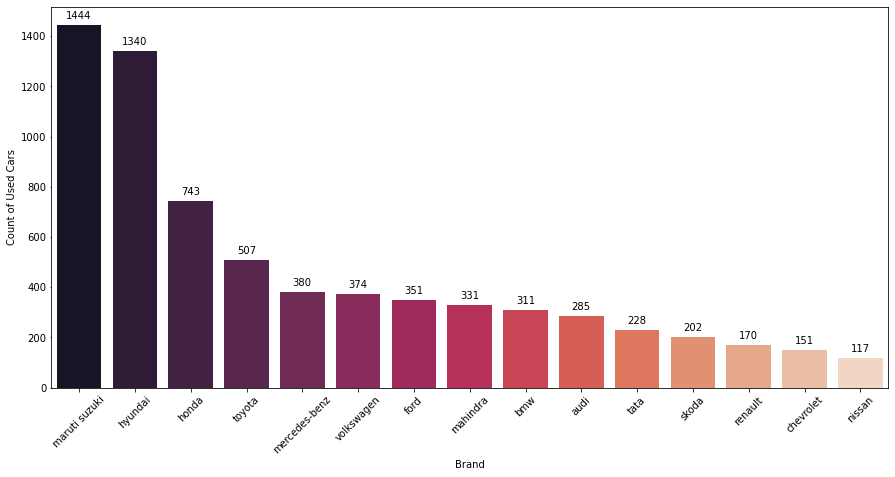

<Figure size 432x288 with 0 Axes>

In [59]:
#Bar Plot for 15 most-frequent appearing brands
plt.figure(figsize=(15, 7))
ax=sns.countplot(df["Brand"], order=pd.value_counts(df["Brand"]).iloc[:15].index,palette='rocket')
ax.set(xlabel="Brand", ylabel="Count of Used Cars")
ax.tick_params(axis='y',length=1)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

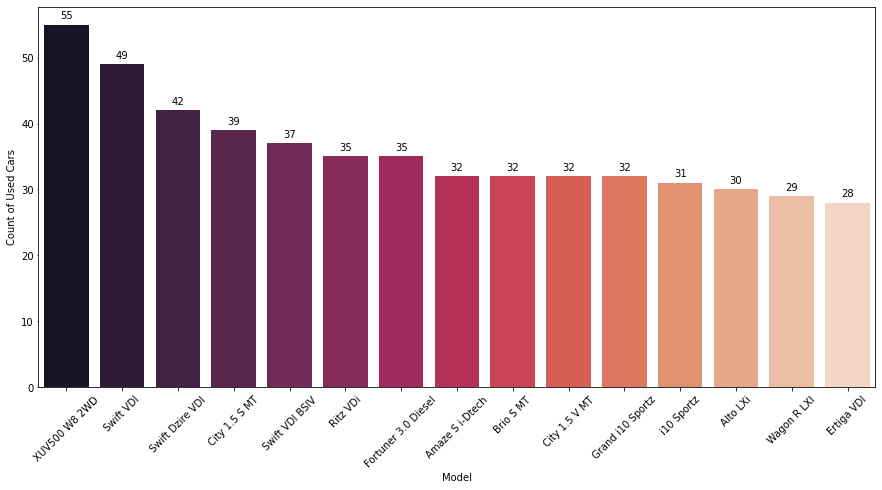

<Figure size 432x288 with 0 Axes>

In [60]:
#Bar Plot for 15 most-frequent appearing Models
plt.figure(figsize=(15, 7))
ax=sns.countplot(df["Model"], order=pd.value_counts(df["Model"]).iloc[:15].index,palette='rocket')
ax.set(xlabel="Model", ylabel="Count of Used Cars")
ax.tick_params(axis='y',length=1)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

In [61]:
df_Brand=df.groupby('Brand')[['New_price','Price']].mean()
df_Brand.columns=['Avg_New_Price','Avg_Used_Car_Price']
df_Brand=df_Brand.fillna(0)
df_Brand.sort_values('Avg_Used_Car_Price').tail(5)

,Avg_New_Price,Avg_Used_Car_Price
Brand,,
jaguar,58.455714,37.632250
land rover,119.322000,39.259500
porsche,136.000000,48.348333
bentley,375.000000,59.000000
lamborghini,0.000000,120.000000


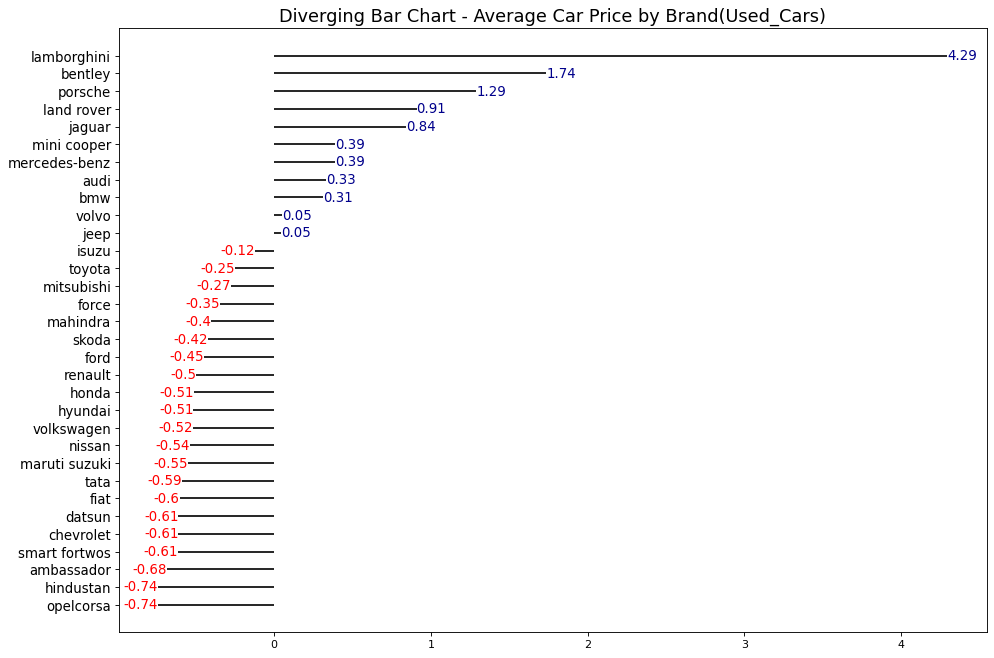

In [62]:
x=df_Brand.loc[:,['Avg_Used_Car_Price']]
df_Brand['Price_z']=(x-x.mean())/x.std()
df_Brand.sort_values('Price_z',inplace=True)
df_Brand.reset_index(inplace=True)

plt.figure(figsize=(14,10), dpi=80)

# Plotting the horizontal lines
plt.hlines(y=df_Brand.index, xmin=0, xmax=df_Brand.Price_z)
for x, y, tex in zip(df_Brand.Price_z, df_Brand.index, df_Brand.Price_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', verticalalignment='center', fontdict={'color': 'red' if x < 0 else 'darkblue', 'size': 12})
    
plt.yticks(df_Brand.index, df_Brand.Brand, fontsize=12)
plt.title("Diverging Bar Chart - Average Car Price by Brand(Used_Cars)", fontdict={"size": 16})
plt.grid(linestyle = ' ', alpha=0.5)
plt.show()

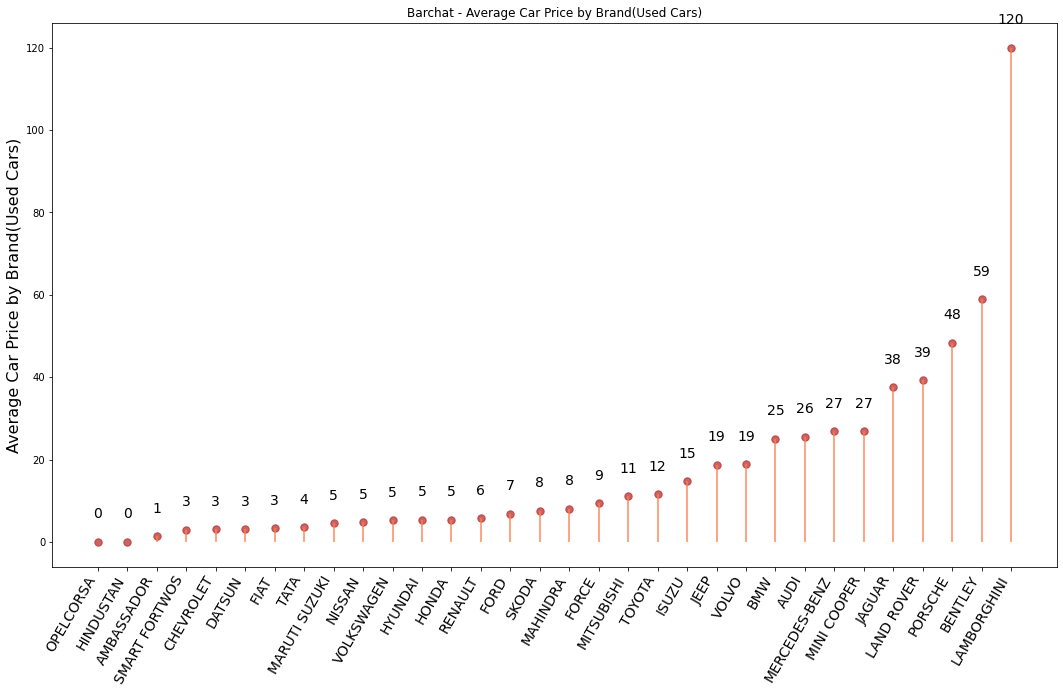

In [63]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.vlines(x=df_Brand.index, ymin=0, ymax=df_Brand.Avg_Used_Car_Price, color= 'coral', alpha=0.7, linewidth=2)
ax.scatter(x=df_Brand.index, y=df_Brand.Avg_Used_Car_Price, s = 55, color='firebrick', alpha = 0.7 )
ax.set_title("Barchat - Average Car Price by Brand(Used Cars)")
ax.set_ylabel("Average Car Price by Brand(Used Cars)", fontsize=16)
ax.set_xticks(df_Brand.index)
ax.set_xticklabels(df_Brand.Brand.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':14})
for row in df_Brand.itertuples():
    ax.text(row.Index, row.Avg_Used_Car_Price+5, s=round(row.Avg_Used_Car_Price), horizontalalignment = 'center', verticalalignment='bottom', fontsize=14)
plt.show()

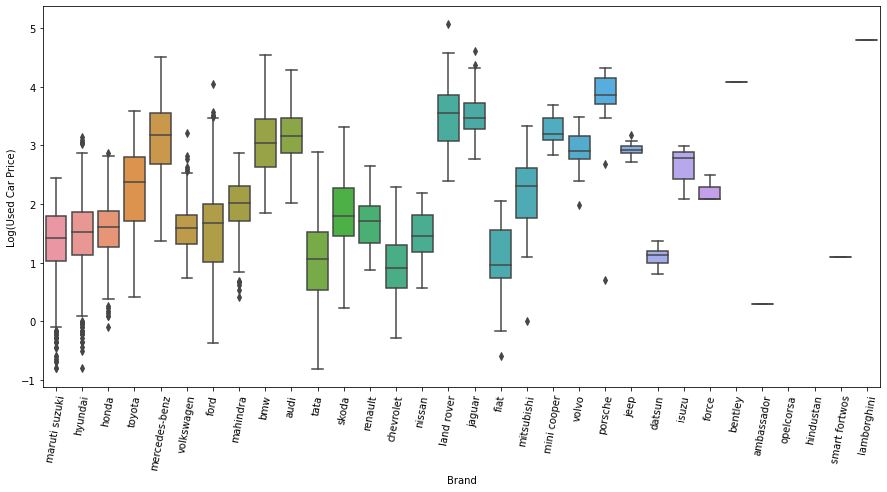

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [64]:
plt.figure(figsize=(15, 7))
plt1=sns.boxplot(x="Brand",y="Price_log",data=df, order=pd.value_counts(df["Brand"]).index,)
plt1.set(xlabel="Brand", ylabel="Log(Used Car Price)")
plt.xticks(rotation=80)
plt.show()
plt.tight_layout

In [65]:
def boxplot3(z):
    plt.figure(figsize=(25, 5)) 
    sns.boxplot(x=z, y=df['Price_log'], hue=df['Fuel_Type']) 
    plt.xticks(rotation=45)
    plt.show()
    plt.figure(figsize=(25, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=df['Price_log'],hue=df['Fuel_Type'],showfliers=False) #turning off the outliers
    plt.xticks(rotation=45)
    plt.show()    

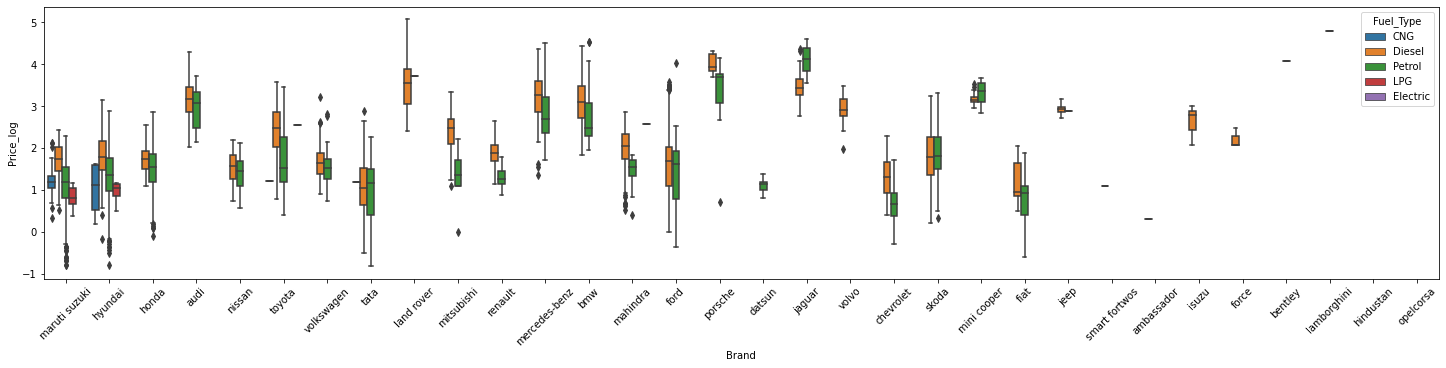

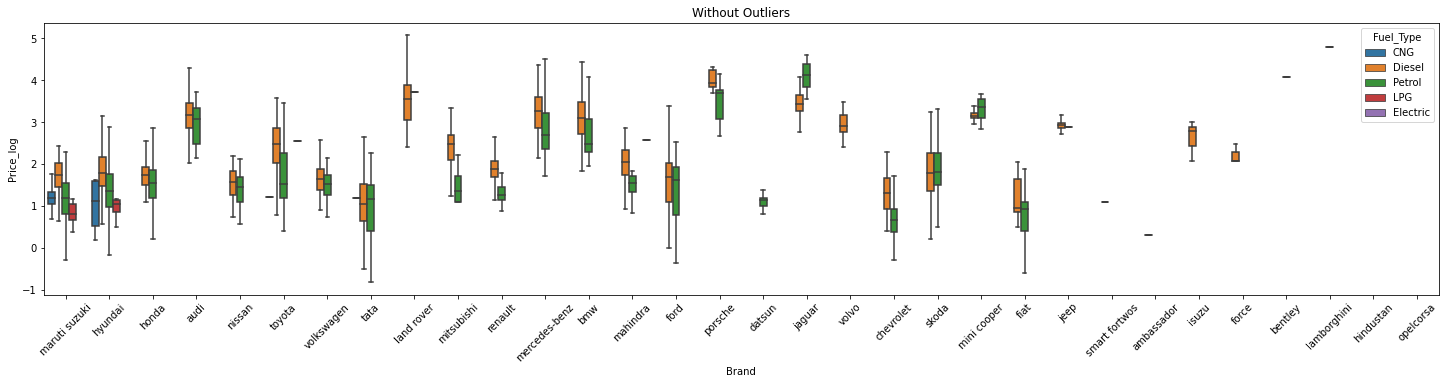

In [66]:
boxplot3(df["Brand"])

In [67]:
def boxplot4(z):
    plt.figure(figsize=(25, 5)) 
    sns.boxplot(x=z, y=df['Price_log'], hue=df['Transmission']) 
    plt.xticks(rotation=45)
    plt.show()
    plt.figure(figsize=(25, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=df['Price_log'],hue=df['Transmission'],showfliers=False) #turning off the outliers
    plt.xticks(rotation=45)
    plt.show()    

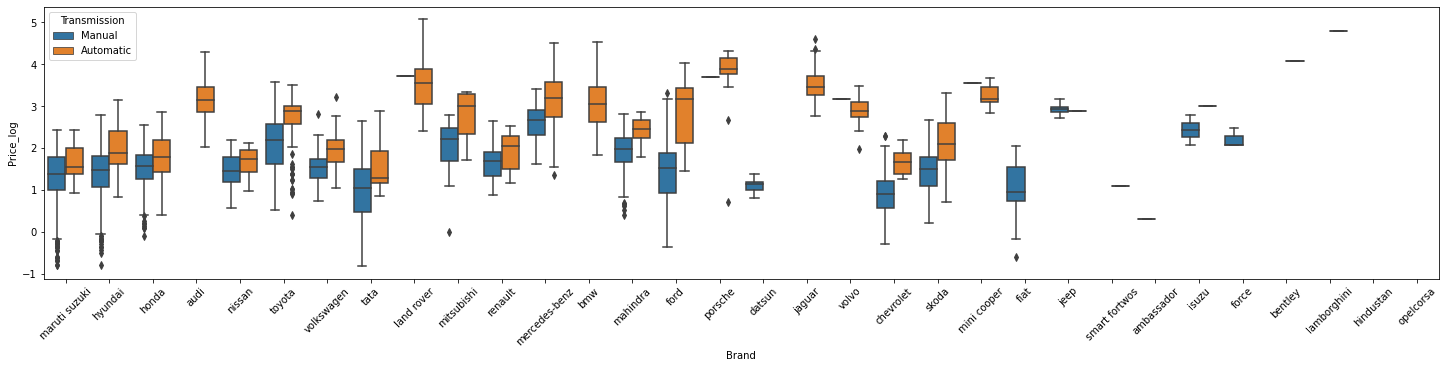

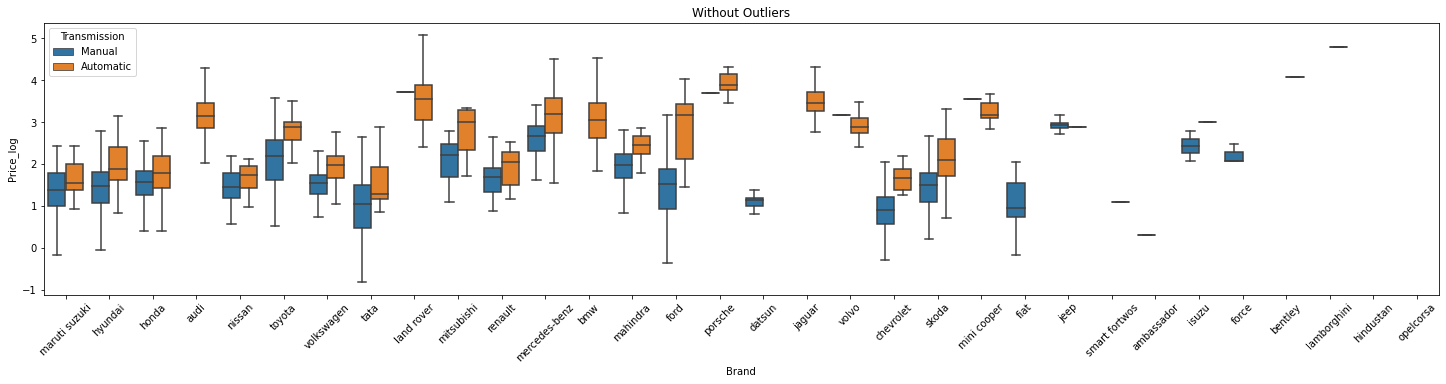

In [68]:
boxplot4(df["Brand"])

In [69]:
brands=['maruti suzuki','hyundai','honda','toyota','mercedes-benz']
brands_filter=df['Brand'].isin(brands)
brands_filter=df.loc[brands_filter]

In [70]:
df_fuel_gptest=brands_filter[['Brand','Fuel_Type','Price']]
grouped_fuel_test = df_fuel_gptest.groupby(['Brand','Fuel_Type'],as_index=False).mean()
grouped_fuel_pivot = grouped_fuel_test.pivot(index='Brand',columns='Fuel_Type')
grouped_fuel_pivot=grouped_fuel_pivot.fillna(0)
grouped_fuel_pivot.unstack()

       Fuel_Type  Brand        
Price  CNG        honda             0.000000
                  hyundai           3.262500
                  maruti suzuki     3.551837
                  mercedes-benz     0.000000
                  toyota            3.350000
       Diesel     honda             5.963413
                  hyundai           7.066854
                  maruti suzuki     5.901272
                  mercedes-benz    28.775941
                  toyota           12.916302
       Electric   honda             0.000000
                  hyundai           0.000000
                  maruti suzuki     0.000000
                  mercedes-benz     0.000000
                  toyota           12.750000
       LPG        honda             0.000000
                  hyundai           2.630000
                  maruti suzuki     2.344000
                  mercedes-benz     0.000000
                  toyota            0.000000
       Petrol     honda             5.267531
                  hyund

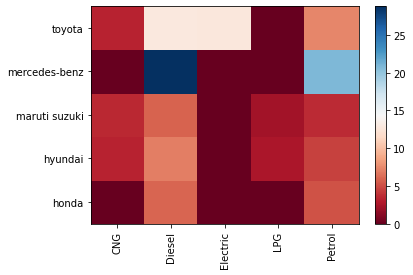

In [71]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_fuel_pivot, cmap='RdBu')

#label names
row_labels = grouped_fuel_pivot.columns.levels[1]
col_labels =grouped_fuel_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_fuel_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_fuel_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [72]:
# grouping results
df_transmission_gptest = brands_filter[['Brand','Transmission','Price']]
grouped_transmission_test = df_transmission_gptest.groupby(['Brand','Transmission'],as_index=False).mean()
grouped_transmission_pivot = grouped_transmission_test.pivot(index='Brand',columns='Transmission')
grouped_transmission_pivot=grouped_transmission_pivot.fillna(0)
grouped_transmission_pivot.unstack()

       Transmission  Brand        
Price  Automatic     honda             6.627308
                     hyundai           8.084189
                     maruti suzuki     5.717374
                     mercedes-benz    27.490400
                     toyota           16.932424
       Manual        honda             5.081151
                     hyundai           4.920459
                     maruti suzuki     4.410423
                     mercedes-benz    15.467778
                     toyota            9.881667
dtype: float64

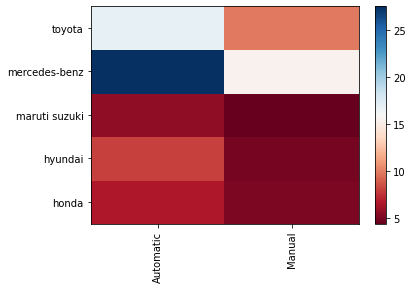

In [73]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_transmission_pivot, cmap='RdBu')

#label names
row_labels = grouped_transmission_pivot.columns.levels[1]
col_labels =grouped_transmission_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_transmission_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_transmission_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [74]:
# grouping results
df_seats_gptest = brands_filter[['Brand','Seats','Price']]
grouped_seats_test = df_seats_gptest.groupby(['Brand','Seats'],as_index=False).mean()
grouped_seats_pivot = grouped_seats_test.pivot(index='Brand',columns='Seats')
grouped_seats_pivot=grouped_seats_pivot.fillna(0)
grouped_seats_pivot.unstack()

       Seats  Brand        
Price  2.0    honda             0.000000
              hyundai           0.000000
              maruti suzuki     0.000000
              mercedes-benz    61.333333
              toyota            0.000000
       4.0    honda             0.000000
              hyundai           0.000000
              maruti suzuki     1.588333
              mercedes-benz    40.000000
              toyota            0.000000
       5.0    honda             5.373380
              hyundai           5.235486
              maruti suzuki     4.450009
              mercedes-benz    25.200546
              toyota            6.850922
       7.0    honda             6.815000
              hyundai          12.656842
              maruti suzuki     6.537765
              mercedes-benz    40.810588
              toyota           15.721066
       8.0    honda             0.000000
              hyundai           0.000000
              maruti suzuki     1.981250
              mercedes-benz  

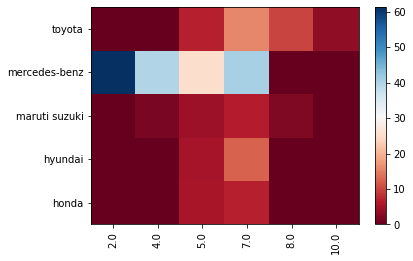

In [75]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_seats_pivot, cmap='RdBu')

#label names
row_labels = grouped_seats_pivot.columns.levels[1]
col_labels =grouped_seats_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_seats_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_seats_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### **Observations and Insights:**

- The three major players are **Maruti, Hyundai and Honda** taking up  more than 45% of the market share.**
- The box plot suggests that these three top selling brands have very similiar average prices which means that these brands are catered towards a wider range of population which is the lower income group in India.

In [76]:
df.to_csv("used_cars_before_imputation.csv",index=False)
df.to_excel("used_cars_before_imputation.xlsx",index=False)

### **Treating missing values**

In [1634]:
cars=pd.read_csv("used_cars_before_imputation.csv")
cars.head()

,Location,Year,KM_driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_driven_log,Price_log,New_price_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,NaN,maruti suzuki,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,NaN,hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,2.152924,honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,NaN,maruti suzuki,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,NaN,audi,A4 New 2.0 TDI Multitronic


In [1635]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7252 non-null   object 
 1   Year           7252 non-null   int64  
 2   KM_driven      7252 non-null   int64  
 3   Fuel_Type      7252 non-null   object 
 4   Transmission   7252 non-null   object 
 5   Owner_Type     7252 non-null   object 
 6   Mileage        7169 non-null   float64
 7   Engine         7206 non-null   float64
 8   Power          7077 non-null   float64
 9   Seats          7199 non-null   float64
 10  New_price      1006 non-null   float64
 11  Price          6018 non-null   float64
 12  KM_driven_log  7252 non-null   float64
 13  Price_log      6018 non-null   float64
 14  New_price_log  1006 non-null   float64
 15  Brand          7252 non-null   object 
 16  Model          7252 non-null   object 
dtypes: float64(9), int64(2), object(6)
memory usage: 963

In [1636]:
#replace null values of Seats by its mode
max_seats= cars['Seats'].value_counts().idxmax()
cars['Seats'].replace(np.nan, max_seats, inplace=True)
cars["Seats"].isnull().sum()

0

In [1637]:
cars['Seats']=cars['Seats'].astype("category")

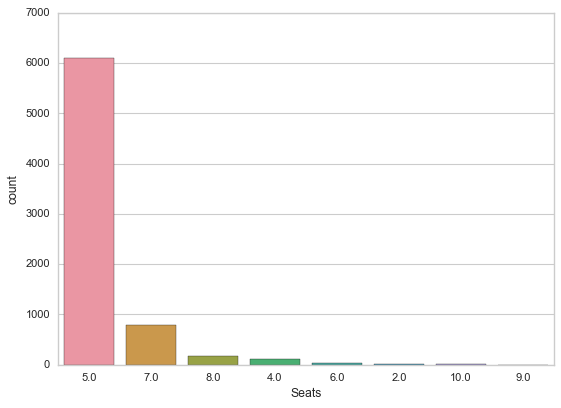

In [1638]:
sns.countplot(cars['Seats'], order=cars['Seats'].value_counts().index, data=cars)
plt.show()

In [1639]:
cars['Year']=cars['Year'].astype("category")

In [1640]:
cars[['Mileage','Engine','Power','New_price']].isnull().sum()

Mileage        83
Engine         46
Power         175
New_price    6246
dtype: int64

In [1641]:
cars["Mileage"]=cars.groupby(['Brand','Model'])['Mileage'].transform(lambda x: x.fillna(x.median()))
cars['Mileage'].isnull().sum()

80

In [1642]:
cars["Mileage"]=cars.groupby(['Brand'])['Mileage'].transform(lambda x: x.fillna(x.median()))
cars['Mileage'].isnull().sum()

1

In [1643]:
#replacing the null values by its median
cars["Engine"]=cars.groupby(['Brand','Model'])['Engine'].transform(lambda x: x.fillna(x.median()))
cars['Engine'].isnull().sum()

40

In [1644]:
#replacing the null values by its median
cars["Engine"]=cars.groupby(['Brand'])['Engine'].transform(lambda x: x.fillna(x.median()))
cars['Engine'].isnull().sum()

0

In [1645]:
#replacing the null values by its median
cars["Power"]=cars.groupby(['Brand','Model'])['Power'].transform(lambda x: x.fillna(x.median()))
cars['Power'].isnull().sum()

136

In [1646]:
cars["Power"]=cars.groupby(['Brand'])['Power'].transform(lambda x: x.fillna(x.median()))
cars['Power'].isnull().sum()

2

In [1647]:
#replacing the null values by its median
cars["New_price"]=cars.groupby(['Brand','Model'])['New_price'].transform(lambda x: x.fillna(x.median()))
cars['New_price'].isnull().sum()

6019

In [1648]:
#replacing the null values by its median
cars["New_price"]=cars.groupby(['Brand'])['New_price'].transform(lambda x: x.fillna(x.median()))
cars['New_price'].isnull().sum()

159

In [1649]:
cars[['Mileage','Engine','Power','New_price']].isnull().sum()

Mileage        1
Engine         0
Power          2
New_price    159
dtype: int64

In [1650]:
cars[cars["Power"].isnull()]

,Location,Year,KM_driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_driven_log,Price_log,New_price_log,Brand,Model
915,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,NaN,3.0,11.542484,1.098612,NaN,smart fortwos,Fortwo CDI AT
6215,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,NaN,11.082143,NaN,NaN,hindustan,Motors Contessa 2.0 DSL


In [1651]:
#dropping the observation (there is only one observation for smart fortwos)
cars.drop([915],inplace=True)
cars[cars["Power"].isnull()]

,Location,Year,KM_driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_driven_log,Price_log,New_price_log,Brand,Model
6215,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,NaN,11.082143,NaN,NaN,hindustan,Motors Contessa 2.0 DSL


In [1652]:
#imputing the missing values with mean for New_price                                        
cars["New_price"]=cars["New_price"].fillna(value=cars["New_price"].mean())

In [1653]:
cars["New_price_log"]=np.log(cars["New_price"])

In [1654]:
cars.isnull().sum()

Location            0
Year                0
KM_driven           0
Fuel_Type           0
Transmission        0
Owner_Type          0
Mileage             0
Engine              0
Power               1
Seats               0
New_price           0
Price            1234
KM_driven_log       0
Price_log        1234
New_price_log       0
Brand               0
Model               0
dtype: int64

In [1655]:
cars_df=cars[cars['Price'].notna()]

In [1656]:
cars_df.isnull().sum()

Location         0
Year             0
KM_driven        0
Fuel_Type        0
Transmission     0
Owner_Type       0
Mileage          0
Engine           0
Power            0
Seats            0
New_price        0
Price            0
KM_driven_log    0
Price_log        0
New_price_log    0
Brand            0
Model            0
dtype: int64

In [1657]:
cars_df["New_price_log"]=np.log(cars_df["New_price"])

In [1658]:
cars_df.isnull().sum()

Location         0
Year             0
KM_driven        0
Fuel_Type        0
Transmission     0
Owner_Type       0
Mileage          0
Engine           0
Power            0
Seats            0
New_price        0
Price            0
KM_driven_log    0
Price_log        0
New_price_log    0
Brand            0
Model            0
dtype: int64

In [1659]:
cars_df.to_excel('used_cars_clean.xlsx', index=False)
cars_df.to_csv('used_cars_clean.csv', index=False)

## **Conclusions:**

We can infer from our analysis that  the price of used cars increases as the power of the car increases , also automatic cars are more expensive than manuals.About 71% of cars sold are manual while the rest are automatic.The distribution charts suggests that Mumbai and Hyderabad being largely populated cover about 25% of the total used cars sales, while Ahmedabad has the least sales (about 3.7%).Majority of the cars fall into the category of diesel followed by petrol and very few cars sold use LPG,CNG and only 2 are electric. About 5900(~ 82%) cars have first ownership while only about 1100(~ 15%) have second and only 1.8% have third ownership. Most used cars sold are 5 seaters. It can be inferred from the boxplots above that  the Automatic cars manufactured in the last decade, 2 seaters cars, preferably using Diesel which are sold by first time owners and have high Power and Engine are more expensive than others.

*After careful exploration and analysis of our data in hand , we  have narrowed down a few variables which  potentially might be good predictors of price and will help us in building a pricing model that the business can use to effectively predict the price of the used cars.*

**Important Variables that influens the price of used cars:**

**Continuous numerical variables:**

    Engine
    Power
    Mileage
    New_price_log

**Categorical variables:**

    Transmission
    Owner_Type
    Fuel_Type
    Year
    
As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.


## **Proposed Approach**

**Our Next Steps into Model Building Process** 

- Prepare the data by getting dummy variables for our categorical variables in the dataset
- Split the dataset into dependent and independent variables
- Further split the  data into training and testing sets (70% training and 30% testing)
- Feature Selection Process (removing the independent variables from our model using model tuning methods like **Ridge and Lasso regression** thereby **checking the assumptions of Linear regression using VIF and other tests**)
- Model Selection
- Hypertuning
- Evaluation metrics
- Final Model Selection
- Proposed Recommendations and Solutions

**


# Model Development

## Objectives

<p>In this section, we will develop several models that will predict the price of the used car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


Key questions:

<ul>
    <li>Is the dealer offering fair value for my trade-in?</li>
    <li>Am I putting a fair value on my car?</li>
</ul>
<p>In Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [1660]:
#importing libraries
import pandas as pd
import numpy as np

#import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
#import library for scaling the data
from sklearn.preprocessing import StandardScaler

# import library for preparing data
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Metrics to evaluate the model
from sklearn import metrics

In [1661]:
#Load the dataset
cars_data=pd.read_csv('used_cars_clean.csv')
cars_data.head()

,Location,Year,KM_driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,KM_driven_log,Price_log,New_price_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,7.920,1.75,11.184421,0.559616,2.069391,maruti suzuki,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,9.780,12.50,10.621327,2.525729,2.280339,hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610,4.50,10.736397,1.504077,2.152924,honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.215,6.00,11.373663,1.791759,2.417252,maruti suzuki,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.140,17.74,10.613246,2.875822,3.972930,audi,A4 New 2.0 TDI Multitronic


In [1662]:
cars_data.shape

(6017, 17)

This dataset consists of 6018 observations and 17 columns

In [1663]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6017 non-null   object 
 1   Year           6017 non-null   int64  
 2   KM_driven      6017 non-null   int64  
 3   Fuel_Type      6017 non-null   object 
 4   Transmission   6017 non-null   object 
 5   Owner_Type     6017 non-null   object 
 6   Mileage        6017 non-null   float64
 7   Engine         6017 non-null   float64
 8   Power          6017 non-null   float64
 9   Seats          6017 non-null   float64
 10  New_price      6017 non-null   float64
 11  Price          6017 non-null   float64
 12  KM_driven_log  6017 non-null   float64
 13  Price_log      6017 non-null   float64
 14  New_price_log  6017 non-null   float64
 15  Brand          6017 non-null   object 
 16  Model          6017 non-null   object 
dtypes: float64(9), int64(2), object(6)
memory usage: 799

There are no missing values in our dataset

In [1664]:
def Bar_chart1(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(cars_data[z]) # length of the column
    plt.figure(figsize=(15,8))
    ax = sns.countplot(cars_data[z],palette='Paired',order = cars_data[z].value_counts().index)
    ax.set(ylabel="Used Car Sales")
    plt.xticks(rotation=45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y+10), size = 12) # annotate the percantage 
    plt.show() # show the plot

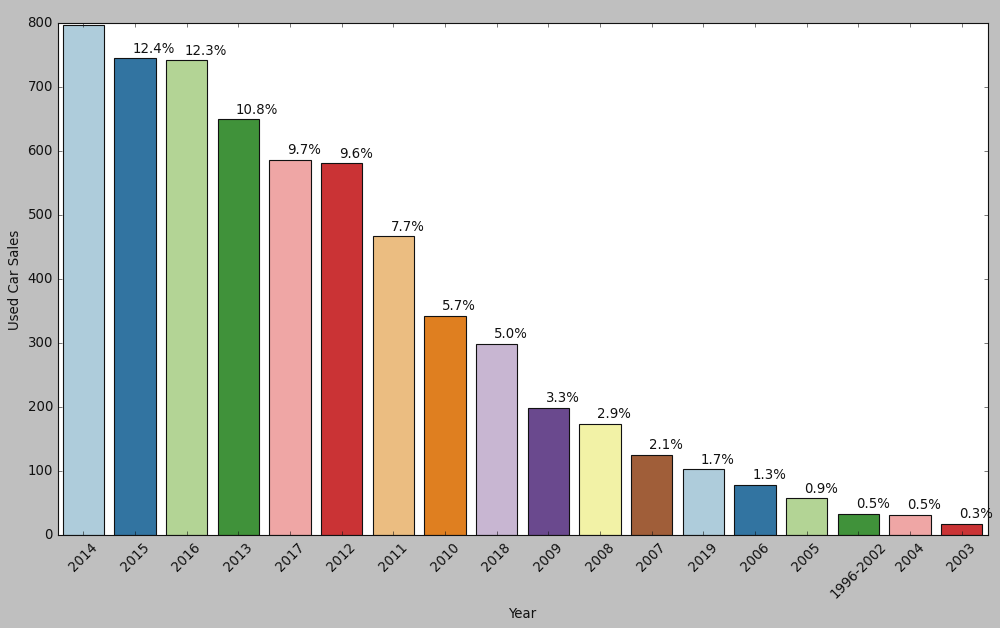

In [1665]:
list_years=[1996,1997,1998,1999,2000,2001,2002]
cars_data['Year']=cars_data['Year'].apply(lambda x: '1996-2002' if x in list_years else x)
cars_data['Year'].nunique()

Bar_chart1('Year') 

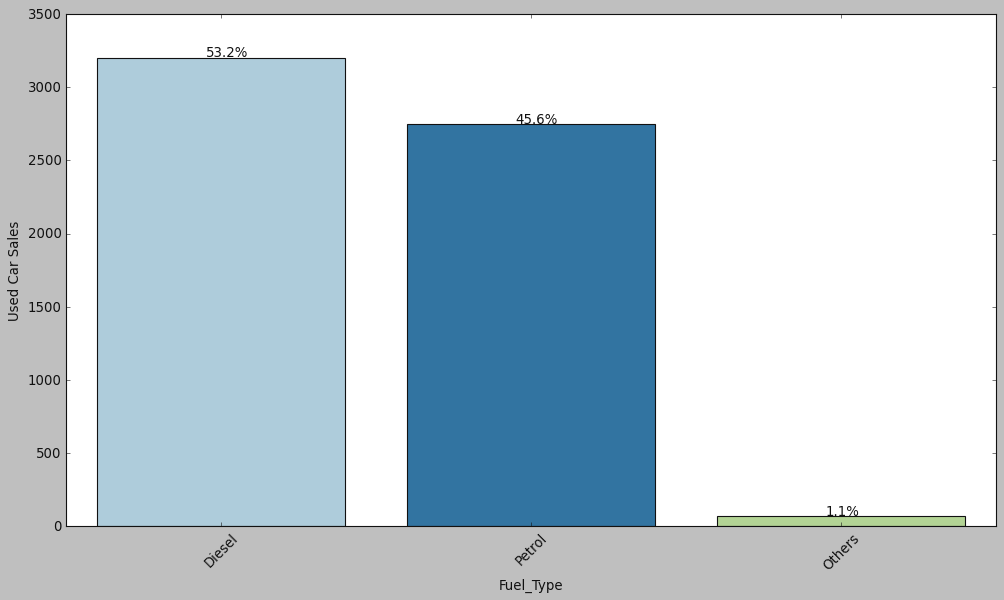

In [1666]:
cars_data['Fuel_Type']=cars_data['Fuel_Type'].apply(lambda x: 'Others' if x in ['CNG','LPG','Electric'] else x)
cars_data['Fuel_Type'].nunique()
Bar_chart1('Fuel_Type')    

In [1667]:
#converting the datatype of Year and Seats from int to category
cars_data['Year']=cars_data['Year'].astype("category")
cars_data['Seats']=cars_data['Seats'].astype("category")

In [1668]:
cars_data.describe()

,KM_driven,Mileage,Engine,Power,New_price,Price,KM_driven_log,Price_log,New_price_log
count,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,57660.513711,18.321539,1620.072295,112.739604,20.408848,9.471318,10.757830,1.824825,2.666617
std,37877.421626,4.166235,600.091698,53.637280,22.604937,11.166542,0.713009,0.873629,0.736967
min,171.000000,6.400000,72.000000,34.200000,3.910000,0.440000,5.141664,-0.820981,1.363537
25%,34000.000000,15.290000,1197.000000,75.000000,9.510000,3.500000,10.434116,1.252763,2.252344
50%,53000.000000,18.200000,1493.000000,93.700000,11.150000,5.640000,10.878047,1.729884,2.411439
75%,73000.000000,21.100000,1984.000000,138.100000,20.277708,9.950000,11.198215,2.297573,3.009522
max,775000.000000,33.540000,5998.000000,560.000000,375.000000,160.000000,13.560618,5.075174,5.926926


### **Split the dataset**
Let's split the data into the (response)dependent and (predictors)independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [1669]:
#seperating the independent dependent variable
X=cars_data.drop(['Price','Price_log', 'KM_driven','Model','New_price'],axis=1)
y=cars_data[['Price','Price_log']]

### **Creating dummy variables for the categorical variables**

** In linear based models, whenever we have categorical variables as independent variables, we need to create **one hot encoded** representation (which is also known as dummy variables) of those categorical variables. The code belowis creating dummy variables and we are removing the first category in those variables which is known as **reference variable**. The reference variable helps to interpret the linear regression.**

In [1670]:
X_dummies=pd.get_dummies(X,drop_first=True)
X_dummies.head()

,Mileage,Engine,Power,KM_driven_log,New_price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_1996-2002,Fuel_Type_Others,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land rover,Brand_mahindra,Brand_maruti suzuki,Brand_mercedes-benz,Brand_mini cooper,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo
0,26.60,998.0,58.16,11.184421,2.069391,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,19.67,1582.0,126.20,10.621327,2.280339,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.20,1199.0,88.70,10.736397,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20.77,1248.0,88.76,11.373663,2.417252,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15.20,1968.0,140.80,10.613246,3.972930,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Splitting the data into 70% train and 30% test set**

Let's split the data into the predictors(independent) and the response(dependent) variable and further split it into train and test set in a ratio of 70:30 for train and test set.

In [1671]:
#Splitting data into training and test set:
X_train,X_test,y_train,y_test=train_test_split(X_dummies,y,test_size=0.3,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(4211, 73) (1806, 73) (4211, 2) (1806, 2)


### **Fitting the linear model**

In [1672]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.

def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    #pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    #pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train["Price_log"],pred_train)
    test_r2=metrics.r2_score(y_test["Price_log"],pred_test)
    train_rmse=metrics.mean_squared_error(y_train["Price_log"],pred_train,squared=False)
    test_rmse=metrics.mean_squared_error(y_test["Price_log"],pred_test,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaured on training set : ",metrics.r2_score(y_train["Price_log"],pred_train))
        print("R-squared on test set : ",metrics.r2_score(y_test["Price_log"],pred_test))
        print("Root Mean  Squared Error(RMSE) on training set : ",np.sqrt(metrics.mean_squared_error(y_train["Price_log"],pred_train)))
        print("Root Mean  Squared Error(RMSE) on test set : ",np.sqrt(metrics.mean_squared_error(y_test["Price_log"],pred_test)))
    
    # returning the list with train and test scores
    return score_list

### **Fitting the Linear Regression model from sci-kit learn**

In [1673]:
#Fitting a Linear Regression Model 
lr=LinearRegression().fit(X_train,y_train["Price_log"])
lr

LinearRegression()

In [1674]:
# Checking model performance
lr_model = get_model_score(lr)

R-sqaured on training set :  0.9318724818105789
R-squared on test set :  0.9282290317387519
Root Mean  Squared Error(RMSE) on training set :  0.22959456318231564
Root Mean  Squared Error(RMSE) on test set :  0.23003016207541083


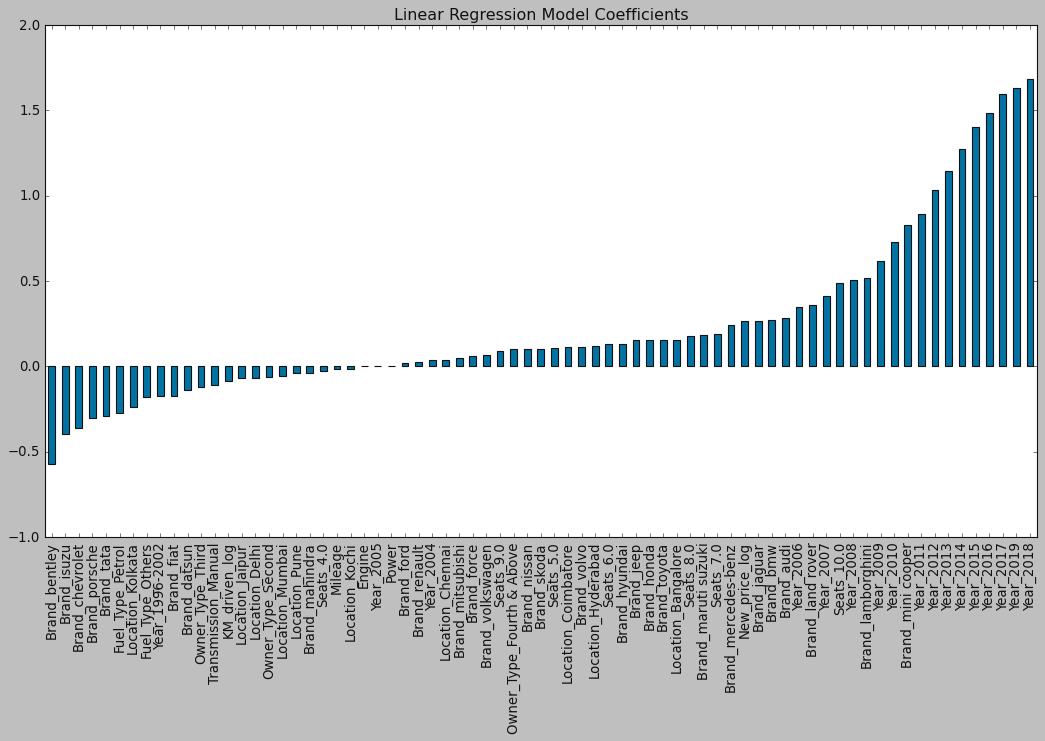

In [1675]:
predictors = X_train.columns
coef = pd.Series(lr.coef_.flatten(),predictors).sort_values()
plt.figure(figsize=(16,8))
coef.plot(kind='bar', title='Linear Regression Model Coefficients')
plt.show()

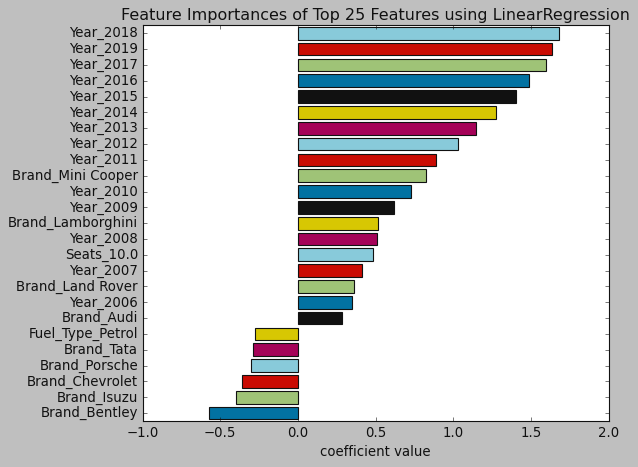

In [1676]:
from yellowbrick.model_selection import FeatureImportances

labels = list(map(lambda s: s.title(), X_train.columns))
viz = FeatureImportances(lr,labels=labels,relative=False,topn=25)
viz.fit(X_train, y_train["Price_log"])
viz.show()

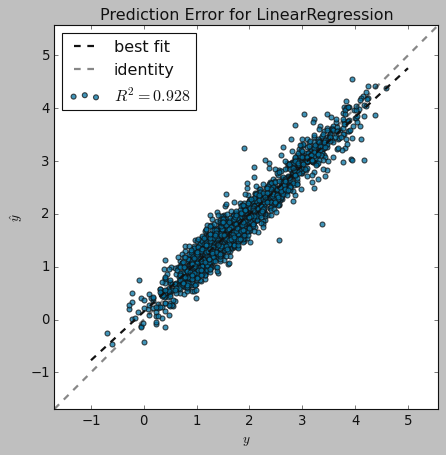

In [1677]:
from yellowbrick.regressor import PredictionError

visualizer=PredictionError(LinearRegression())
visualizer.fit(X_train,y_train["Price_log"])
visualizer.score(X_test,y_test["Price_log"])
visualizer.show()

#### **Observations from results:** 

- R-squared is almost similiar on training and testing sets(~ 0.93) which means that the model is not overfitting on the training data and is generalizing well on the testing set. 
- RMSE is pretty consistent with the training and the testing set(~ 0.23).
- We can see from the plot above that the **manufacturing year has a positive effect on regression model.**Newer models have a greater influence than the older models.

#### **Important variables of Linear Regression**

### Fitting a Linear Regression (OLS) model using statsmodels

In [1678]:
def build_ols_model(X,y):
    # Create the model
    olsmodel = sm.OLS(y, X)
    return olsmodel.fit()

In [1679]:
x_train=sm.add_constant(X_train)
x_test=sm.add_constant(X_test)

In [1680]:
# Fit the linear model 
ols_model1 = build_ols_model(X_train,y_train["Price_log"])
print(ols_model1.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              4310.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):                        0.00
Time:                        00:22:52   Log-Likelihood:                          220.33
No. Observations:                4211   AIC:                                     -294.7
Df Residuals:                    4138   BIC:                                      168.6
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [1681]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(ols_model1.params, columns=['coefficients'])
olsmod['pval']=ols_model1.pvalues

# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coefficients,pval
Brand_renault,0.272020,4.664144e-02
Brand_volvo,0.350046,3.017080e-02
Brand_volkswagen,0.312822,2.087023e-02
Year_1996-2002,-0.176398,1.753371e-02
Brand_skoda,0.343277,1.375171e-02
Brand_jeep,0.391388,1.365220e-02
Brand_nissan,0.345026,1.209558e-02
Seats_8.0,0.208048,1.040386e-02
Location_Mumbai,-0.056805,6.966800e-03
Brand_toyota,0.393918,5.779879e-03


In [1682]:
# Significant varaibles

imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in X.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Brand', 'Year', 'Seats', 'Location', 'Owner_Type', 'Fuel_Type', 'Engine', 'Transmission', 'Mileage', 'New_price_log', 'KM_driven_log', 'Power']


**Checking for assumptions**

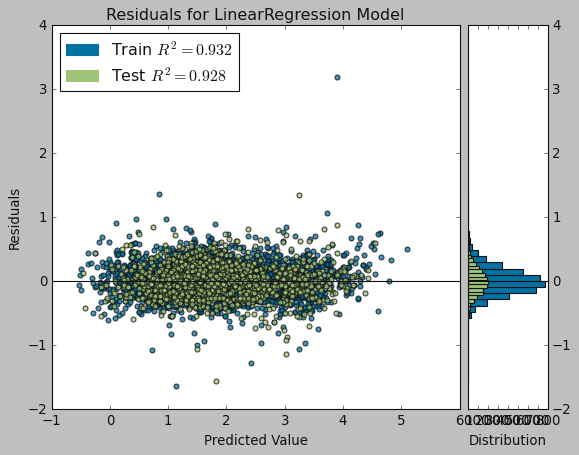

In [1683]:
from yellowbrick.regressor import ResidualsPlot

visualizer=ResidualsPlot(LinearRegression())
visualizer.fit(X_train,y_train["Price_log"])
visualizer.score(X_test,y_test["Price_log"])
visualizer.show()

In [1684]:
residual = ols_model1.resid # Residuals
residual.mean()

5.6634269040672993e-05

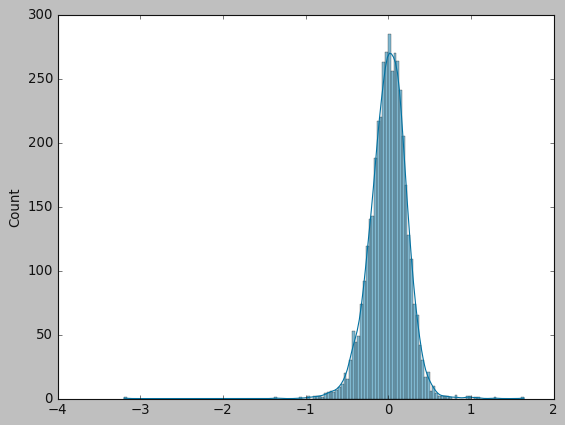

In [1685]:
# Plot histogram of residuals
sns.histplot(residual, kde=True)

### <b> Ridge Regression (L2 Regularization)</b><br>

In [1686]:
X_train.shape, y_train["Price_log"].shape

((4211, 73), (4211,))

In [1687]:
#Fitting the Ridge Regression Model
ridge=Ridge()
ridge.fit(X_train, y_train["Price_log"])

Ridge()

In [1688]:
#checking the performance
get_model_score(ridge)

R-sqaured on training set :  0.9307505588159805
R-squared on test set :  0.9284771135084643
Root Mean  Squared Error(RMSE) on training set :  0.23147732350727598
Root Mean  Squared Error(RMSE) on test set :  0.22963225962282022


[0.9307505588159805,
 0.9284771135084643,
 0.23147732350727598,
 0.22963225962282022]

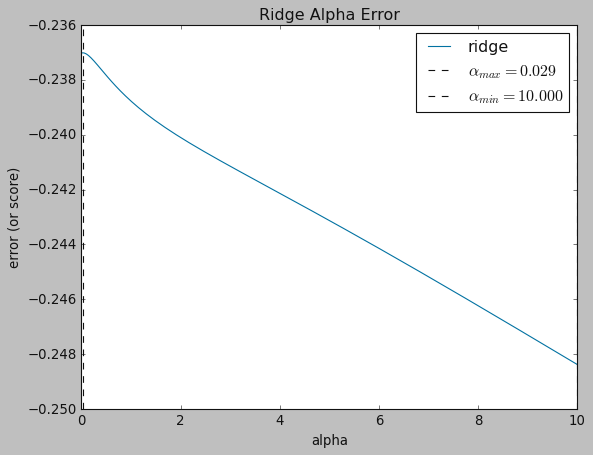

In [1689]:
from yellowbrick.regressor import ManualAlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = ManualAlphaSelection(Ridge(),alphas=alphas,scoring="neg_root_mean_squared_error",cv=5)
visualizer.fit(X_train,y_train["Price_log"])
visualizer.show()

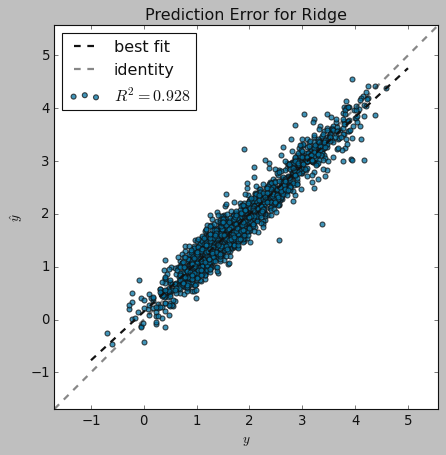

In [1690]:
from yellowbrick.regressor import PredictionError
visualizer=PredictionError(Ridge(alpha=0.029))
visualizer.fit(X_train,y_train["Price_log"])
visualizer.score(X_test,y_test["Price_log"])
visualizer.show()

In [1691]:
ridge_tuned=Ridge(alpha=0.029)
ridge_tuned.fit(X_train, y_train["Price_log"])

Ridge(alpha=0.029)

In [1692]:
#checking the performance
get_model_score(ridge_tuned)

R-sqaured on training set :  0.9318686970914586
R-squared on test set :  0.9282523348014882
Root Mean  Squared Error(RMSE) on training set :  0.22960094047953947
Root Mean  Squared Error(RMSE) on test set :  0.22999281520235385


[0.9318686970914586,
 0.9282523348014882,
 0.22960094047953947,
 0.22999281520235385]

In [1693]:
imp_ridge=pd.DataFrame({ "Feature": X_train.columns,
    "coef": ridge_tuned.coef_})
imp_ridge.sort_values(by="coef",ascending=False)

,Feature,coef
29,Year_2018,1.656300
30,Year_2019,1.606567
28,Year_2017,1.570446
27,Year_2016,1.460897
26,Year_2015,1.374794
25,Year_2014,1.246088
24,Year_2013,1.117594
23,Year_2012,1.006968
22,Year_2011,0.865851
63,Brand_mini cooper,0.810619


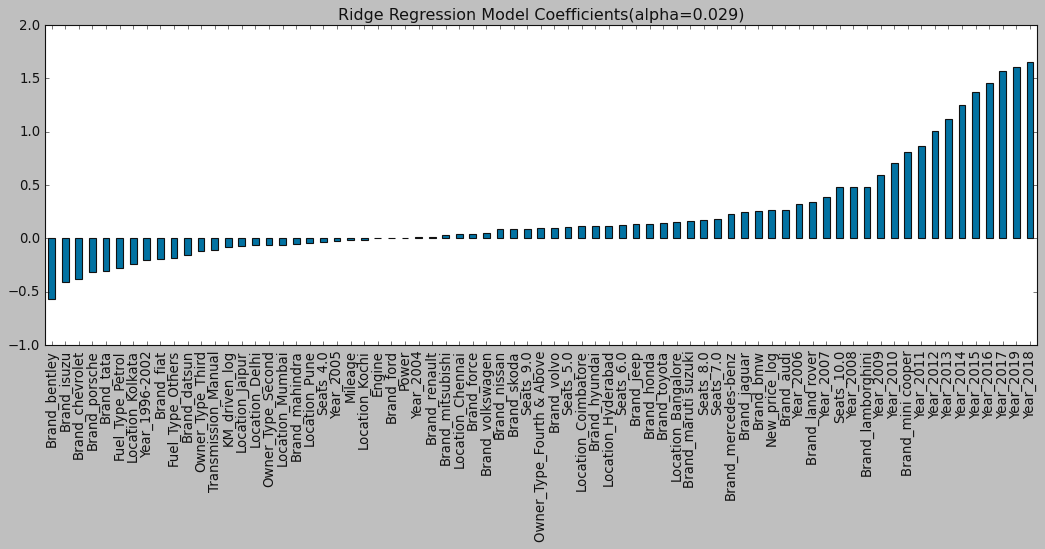

In [1694]:
predictors = X_train.columns
 
coef = pd.Series(ridge_tuned.coef_.flatten(),predictors).sort_values()
plt.figure(figsize=(16,5))
coef.plot(kind='bar', title='Ridge Regression Model Coefficients(alpha=0.029)')
plt.show()

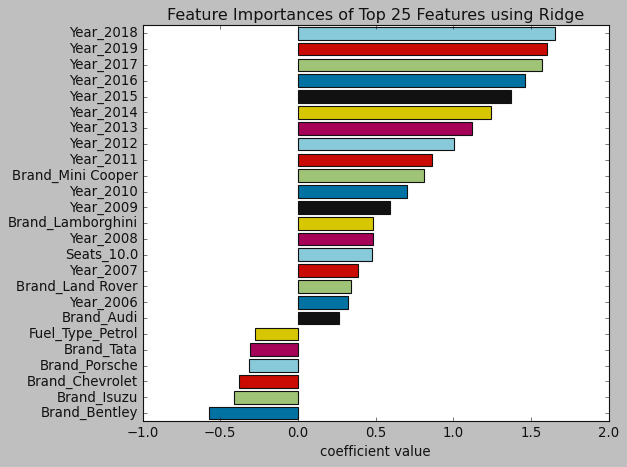

In [1695]:
from yellowbrick.model_selection import FeatureImportances

labels = list(map(lambda s: s.title(), X_train.columns))
viz = FeatureImportances(ridge_tuned,labels=labels,relative=False,topn=25)
viz.fit(X_train, y_train["Price_log"])
viz.show()

**Observations:**

- The **model accuracy for the Ridge Regression is almost (~0.93) similiar to the Linear Regression.**
- **RMSE is ~0.22 for the training and the tesing set** which is also very similiar to the linear regession base model.
- Let us build a model using Lasso regularization technique and check the model performance.
    

### <b> Lasso Regression (L1 Regularization)</b><br>

In [1696]:
X_train.shape, y_train["Price_log"].shape

((4211, 73), (4211,))

In [1697]:
#Fitting the Lasso Regression Model
lasso=Lasso()
lasso.fit(X_train, y_train["Price_log"])

Lasso()

In [1698]:
#checking the performance
get_model_score(lasso)

R-sqaured on training set :  0.5763529100776901
R-squared on test set :  0.609961908286704
Root Mean  Squared Error(RMSE) on training set :  0.5725355119726262
Root Mean  Squared Error(RMSE) on test set :  0.5362457883025398


[0.5763529100776901, 0.609961908286704, 0.5725355119726262, 0.5362457883025398]

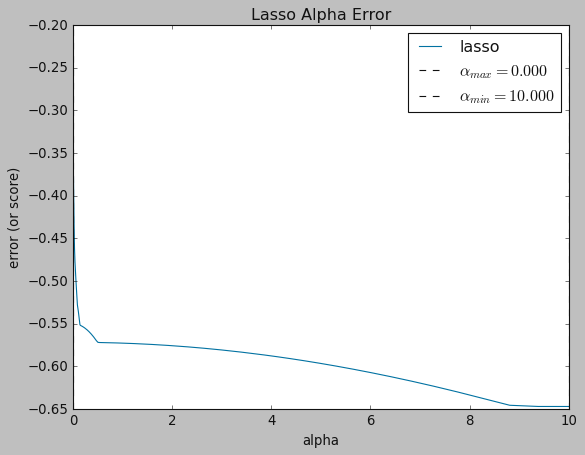

In [1699]:
from sklearn.linear_model import Lasso

alphas = np.logspace(-10, 1, 400)
visualizer = ManualAlphaSelection(Lasso(),alphas=alphas,scoring="neg_root_mean_squared_error",cv=5)
visualizer.fit(X_train,y_train["Price_log"])
visualizer.show()

**Observation:**

Lasso performs very poorly on the training and the testing sets.

## **Decision Tree**

In [1700]:
#Fitting the decision tree classifier on the training data
dec_tree = DecisionTreeRegressor(random_state=1)
dec_tree = dec_tree.fit(X_train, y_train["Price_log"])

In [1701]:
#checking the performance
get_model_score(dec_tree)

R-sqaured on training set :  0.999991818300659
R-squared on test set :  0.8428110559551197
Root Mean  Squared Error(RMSE) on training set :  0.002516066257878456
Root Mean  Squared Error(RMSE) on test set :  0.34042494894366


[0.999991818300659, 0.8428110559551197, 0.002516066257878456, 0.34042494894366]

**Observation:**
    
- R squared for Decision tree is ~0.99 for training set while ~0.84 for testing set which clearly suggests that this model is overfitting on the training set and hence does not generalize well on the testing set.

## **Decision Tree - Hyperparameter Tuning**

In [1702]:
dtree_tuned=DecisionTreeRegressor(random_state=1)

params={'max_depth': list(np.arange(2,20,5)),
                        'min_samples_leaf':[1,3,5,7],
                        'max_leaf_nodes':[2,5,7]+[None],}
grid_obj=GridSearchCV(
dtree_tuned,params,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5)
grid_obj=grid_obj.fit(X_train, y_train["Price_log"])
dtree_tuned=grid_obj.best_estimator_
dtree_tuned.fit(X_train, y_train["Price_log"])

DecisionTreeRegressor(max_depth=17, min_samples_leaf=5, random_state=1)

In [1703]:
#checking the performance
get_model_score(dtree_tuned)

R-sqaured on training set :  0.9377111223663033
R-squared on test set :  0.8613481768724425
Root Mean  Squared Error(RMSE) on training set :  0.21953590967037254
Root Mean  Squared Error(RMSE) on test set :  0.31972248145900756


[0.9377111223663033,
 0.8613481768724425,
 0.21953590967037254,
 0.31972248145900756]

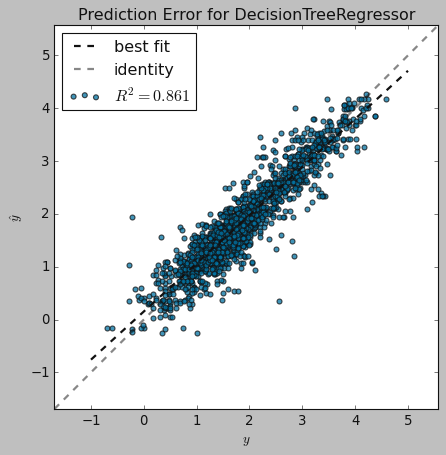

In [1704]:
visualizer=PredictionError(dtree_tuned)
visualizer.fit(X_train,y_train["Price_log"])
visualizer.score(X_test,y_test["Price_log"])
visualizer.show()

### Feature importance

In [1705]:
imp_dtree=pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
imp_dtree.head(10)

,Imp
New_price_log,0.526535
Power,0.215559
KM_driven_log,0.063849
Engine,0.047959
Mileage,0.045286
Fuel_Type_Petrol,0.019563
Location_Kolkata,0.009850
Seats_5.0,0.007764
Year_2015,0.007415
Year_2014,0.006223


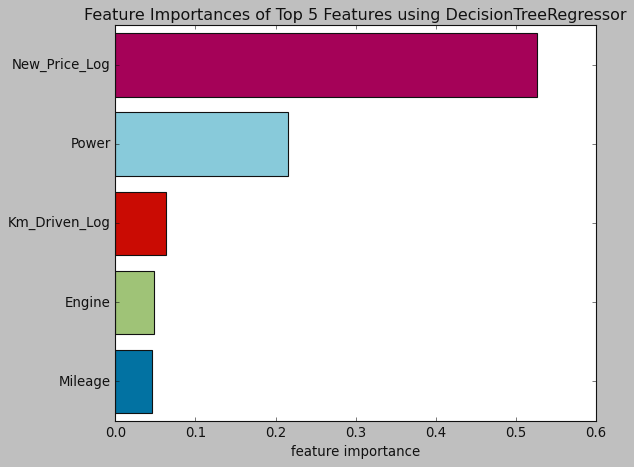

In [1706]:
from yellowbrick.model_selection import FeatureImportances

labels = list(map(lambda s: s.title(), X_train.columns))
viz = FeatureImportances(dtree_tuned,labels=labels,relative=False,topn=5)
viz.fit(X_train, y_train["Price_log"])
viz.show()

**Observation:**
    
- Even after hypertuning the model, the Decision tree does not seem to generalize well on the testing set.
- The **most important features of Decision tree model are Power, New_price_log, KM_driven_log, Engine and Mileage.**

## **Random Forest**

In [1707]:
randfor_regr=RandomForestRegressor(random_state=7)
randfor_regr.fit(X_train, y_train["Price_log"])

RandomForestRegressor(random_state=7)

In [1708]:
#checking the performance
get_model_score(randfor_regr)

R-sqaured on training set :  0.9882199949443516
R-squared on test set :  0.9243708141927698
Root Mean  Squared Error(RMSE) on training set :  0.09547134786060962
Root Mean  Squared Error(RMSE) on test set :  0.23613213577454384


[0.9882199949443516,
 0.9243708141927698,
 0.09547134786060962,
 0.23613213577454384]

**Observation:**
    
- R squared for Random Forest is ~0.98 for training set while ~0.92 for testing set. 
- RMSE is 0.09 for training set and 0.23 fot the testing set.
- Random Forest without any hypertuning clearly shows some signs of overfitting.

## **Random Forest - Hyperparameter Tuning**

In [1709]:
rfor_tuned=RandomForestRegressor(oob_score=True,random_state=7) #oob_score=Score of the training dataset obtained using an out-of-bag estimate.

# Grid of parameters to choose from
params = {"n_estimators":[int(x) for x in np.linspace(100,1000,10)],
          "max_features":['sqrt','log2'],
          "max_depth": [4,5, 6, 7,None]}
                            
                
scorer = metrics.make_scorer(metrics.r2_score)

grid_obj=GridSearchCV(rfor_tuned,params,scorer,n_jobs=-1,cv=5)
grid_obj=grid_obj.fit(X_train, y_train["Price_log"])
rfor_tuned=grid_obj.best_estimator_
rfor_tuned.fit(X_train, y_train["Price_log"])

RandomForestRegressor(max_features='sqrt', n_estimators=700, oob_score=True,
                      random_state=7)

In [1710]:
#checking the performance
get_model_score(rfor_tuned)

R-sqaured on training set :  0.9899753901669591
R-squared on test set :  0.9362568929209762
Root Mean  Squared Error(RMSE) on training set :  0.08807122859147662
Root Mean  Squared Error(RMSE) on test set :  0.216783886056216


[0.9899753901669591,
 0.9362568929209762,
 0.08807122859147662,
 0.216783886056216]

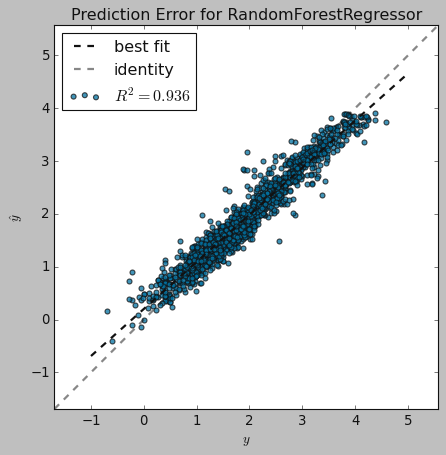

In [1711]:
visualizer=PredictionError(rfor_tuned)
visualizer.fit(X_train,y_train["Price_log"])
visualizer.score(X_test,y_test["Price_log"])

visualizer.show()

In [1712]:
imp_rfor=pd.DataFrame(rfor_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
imp_rfor.head(10)

,Imp
Power,0.200813
New_price_log,0.151315
Engine,0.134042
Transmission_Manual,0.087164
KM_driven_log,0.054430
Mileage,0.050492
Fuel_Type_Petrol,0.043683
Brand_mercedes-benz,0.019862
Year_2017,0.012945
Owner_Type_Second,0.011566


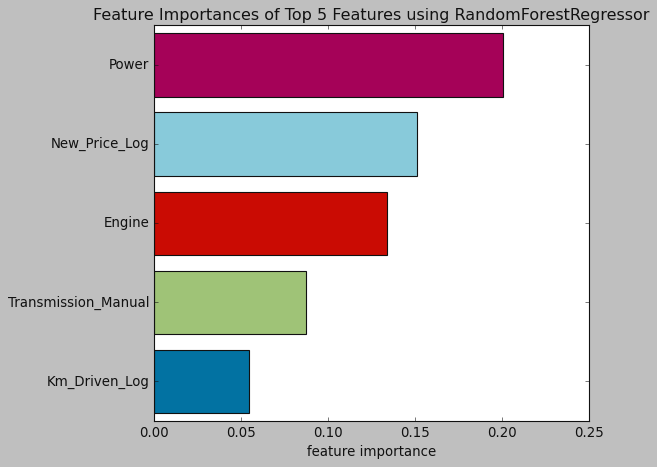

In [1713]:
from yellowbrick.model_selection import FeatureImportances

labels = list(map(lambda s: s.title(), X_train.columns))
viz = FeatureImportances(rfor_tuned,labels=labels,relative=False,topn=5)
viz.fit(X_train, y_train["Price_log"])
viz.show()

**Observation:**
    
- Random Forest with some hypertuning performs really well on the training and testing set.
- The **most important features of Random Forest model are Power, Engine, New_price_log and Transmission_Manual.** 

### **Principal Component Analysis:**

In [1714]:
#Importing PCA 
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_dummies_scaled = scaler.fit_transform(X_dummies)

X_dummies_scaled = pd.DataFrame(X_dummies_scaled, columns=X_dummies.columns)

#Defining the number of principal components to generate 
n =X_dummies.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components=n, random_state=1)
X_dummies_pca =  pd.DataFrame(pca1.fit_transform(X_dummies_scaled))

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

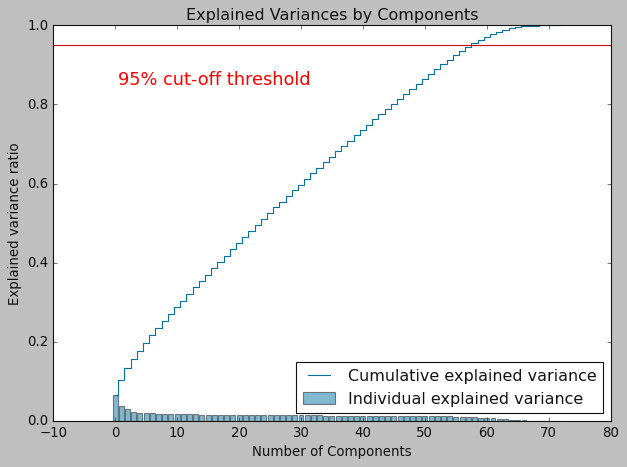

In [1715]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var1)
# Create the visualization plot
plt.bar(range(0,len(exp_var1)), exp_var1, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of Components')
plt.title("Explained Variances by Components")
plt.legend(loc='best')
plt.tight_layout()
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

In [1716]:
#Making a new dataframe with first 5 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5],2), index=X_dummies_scaled.columns, columns=cols)
pc1

,PC1,PC2,PC3,PC4,PC5
Mileage,-0.31,-0.07,0.15,-0.34,0.12
Engine,0.42,0.05,0.00,0.01,-0.04
Power,0.40,-0.17,-0.00,0.01,0.03
KM_driven_log,0.06,0.26,-0.39,-0.22,-0.03
New_price_log,0.38,-0.22,-0.06,-0.08,0.02
Location_Bangalore,0.05,-0.01,-0.08,-0.02,-0.04
Location_Chennai,-0.01,0.07,-0.15,0.02,0.05
Location_Coimbatore,0.04,-0.07,0.20,0.06,-0.08
Location_Delhi,0.03,0.03,-0.01,-0.09,-0.07
Location_Hyderabad,0.00,0.06,-0.05,-0.23,0.02


Observations:
    
- The first principal component **PC1 captures the Mileage, Engine, Power, New_price_log, Transmission.** Power, Engine and New_price_log have a positive effect on the price of the used car.

### **Sequential Feature Selector**

In [1717]:
#### Significant features in Ridge regression model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs1 = SFS(ridge_tuned, 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=5,
           n_jobs=-1, 
           scoring='neg_root_mean_squared_error',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train["Price_log"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.2s finished

[2021-11-06 00:37:21] Features: 1/73 -- score: -0.5726513603976059[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.2s finished

[2021-11-06 00:37:21] Features: 2/73 -- score: -0.5383935464155905[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    0.2s finis

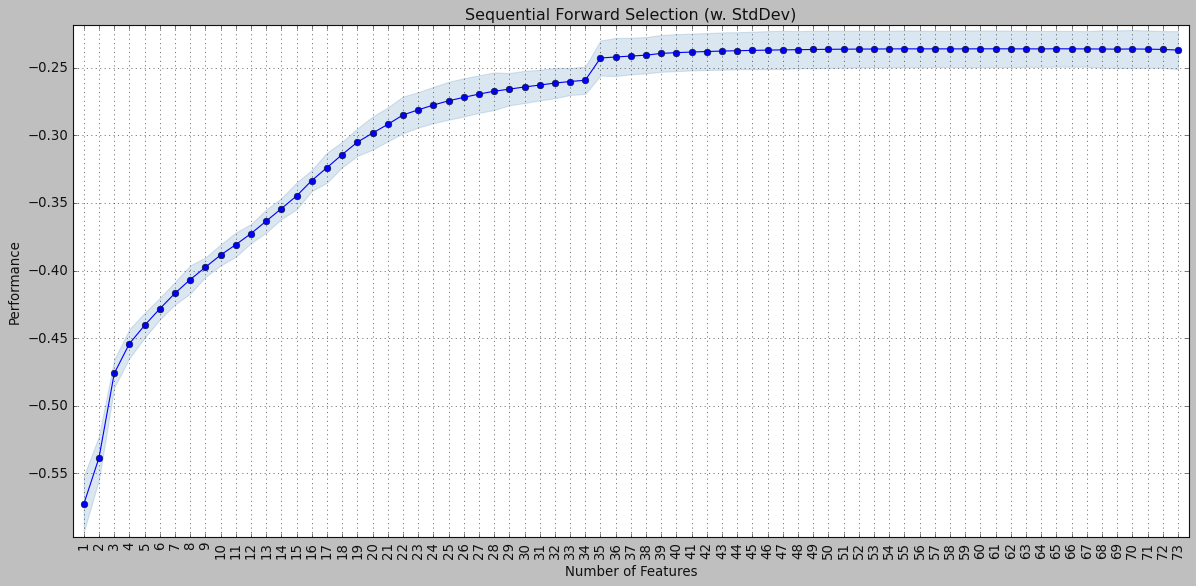

In [1718]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev', figsize=(18, 8))

# plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.margins(0.01, 0.01)
plt.grid()
plt.show()

In [1719]:
sfs1_df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
sfs1_df['avg_score'] = sfs1_df['avg_score'].astype(float)
sfs1_df.sort_values('avg_score', ascending=False).head(3)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
65,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.23893053524642194, -0.2307111208436043, -0...",-0.236053,"(Mileage, Engine, Power, KM_driven_log, New_pr...",0.0170264,0.0132471,0.00662354
61,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15...","[-0.23858521846707964, -0.23144994769720972, -...",-0.236073,"(Mileage, Engine, Power, KM_driven_log, New_pr...",0.0173744,0.0135179,0.00675895
60,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15...","[-0.23864226570946892, -0.2313959039220045, -0...",-0.236074,"(Mileage, Engine, Power, KM_driven_log, New_pr...",0.0174254,0.0135576,0.00677879


### Observations: 

- SequentialFeatureSelector suggests that **Mileage, Power, Engine, KM_driven and New_price are some of the good predictors of the price.**

# Model Evaluation and Refinement

## Objectives
-   Evaluate and refine prediction models

In [1720]:
models = [lr,ridge,ridge_tuned, dec_tree, dtree_tuned, randfor_regr, rfor_tuned]
# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [1721]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge Regression','Decision Tree','Tuned Decision Tree','Random Forest', 'Tuned Random Forest', 'Ridge Tuned'], 
                                          'Train_R-squared': r2_train,
                                 'Test_R-squared': r2_test,
                                 'Train_RMSE':rmse_train,
                                 'Test_RMSE':rmse_test},
                               ) 

comparison_frame.sort_values('Test_RMSE')

,Model,Train_R-squared,Test_R-squared,Train_RMSE,Test_RMSE
6,Ridge Tuned,0.989975,0.936257,0.088071,0.216784
1,Ridge Regression,0.930751,0.928477,0.231477,0.229632
2,Decision Tree,0.931869,0.928252,0.229601,0.229993
0,Linear Regression,0.931872,0.928229,0.229595,0.230030
5,Tuned Random Forest,0.988220,0.924371,0.095471,0.236132
4,Random Forest,0.937711,0.861348,0.219536,0.319722
3,Tuned Decision Tree,0.999992,0.842811,0.002516,0.340425


### **Model Evalustion Results:**

- Ridge Regression performs the best out of all the models. 93% of the variation in price of used cars can be explained by this model giving the RMSE (Root Mean Score Error) of ~0.21.
- Sequential Feature Selector estimator performed forward selection and helped us choose the best features based on cross-validation score of an estimator


**Significant variables from SequentialFeatureSelector(ridge_tuned):**

- Mileage
- Power
- Engine
- KM_driven
- New_price_log

### **Conclusions and Key Insights:**

We have performed a detailed analysis of our used cars dataset which consisted of 7252 observations and 13 features.

- The 'Name' column was a combination of brand and model. So we **extracted the Brand from it to create a new feature 'Brand' and removed the 'Name' column from our analysis.**

- Secondly, We conducted **Univariate anlalysis to understand the distribution of each feature**.In this section we explored that **most frequent cars that appeared in our dataset were Manual cars, Diesel cars,cars sold by first owners, manufacturing years (2014-2016) and 5 seater cars.**

- **Log transformations were performed on KM_driven, Price and New_price to remove skewness and make the distributions normal to facilitate analysis.**

- Next, **Bivariate and Multivariate analysis was conducted by visualizing scatterplots, boxplots and Heatmap to see relationships and strengths of the correlation** between the variables.In this section, we explored some findings that are listed below: 

**Power and Engine Capacity are moderately correlated with the price_log.
There is a strong correlation between New_price_log and Price log.
Mileage and Engine capacity have a moderate negative correlation. This does seems reasonable since supplying more fuel to the engine increases its power and also its fuel consumption. As the volume of the cylinders increases, the power output also increases. But eventually, this reduces the mileage.
Hence we inferred that **Power, Engine, Mileage and New_price_log were some of the potentially good predictors of the used car prices.**

- The dataset was then treated for missing values.

- Next, Some categories like manufacturing year(1996-2002) were combined into one group named **1996-2002**, since there were very little observations for those. Also Fuel_type CNG, LPG and Electric were combined into one group named **Others** since we have very limited observations for those too.

- Next, the dataset was prepared for model building.

- We then ran multiple models like **Linear Regression(OLS), Ridge Regularization, Lasso Regularization, Decision Trees and Random Forest and compared the evaluation metric scores like R-squared and RMSE for each of the models.** 

- WE also performed **dimensionality reduction techniques like Pricipal component analysis (PCA) and Sequential Feature Selector (SFS) to verify the most important features in price prediction.In this section , we explored that Power, Engine Mileage, KM_driven_log and New_price_log are some of the most important features which help in price predction of used cars.**

- Finally we selected the **Ridge Regression tuned model which gave us the best accuracy and performance on the training and testing data.**   

## **Key Recommendations**

- **Maruti Suzuki, Hyundai and Honda** are the three major brands taking up  more than 45% of the market share.
- Newer car models sell at a higher price than older car models. 
- Automatic cars are more expensive than Manual cars which is also suggested in a report by Droom that cars with automatic transmissions have been gaining popularity in the used car market in India.
- Most used cars sold are by first owners. Tier 1 cities like Mumbai and Hyderabad  and tier 2 cities such as Coimbatore and Kochi show most sales of pre-owned cars. To cater the maximum consumer population in India, It is advisable to pay close attention to these tier 1 and tier 2 cities where it might be more profitable in bringing in more High powered engines and cars sold by first owners.
- The business should focus on getting more newer models because of high demand.
- If the business wants to move this model into production, it is recommended to add more data and run some cluster based analysis to understand the demand based on demographics. Using domain specific knowledge and human insight can further help in choosing better features for the prediction task under consideration.
